#**Modelo Preditivo Medicina USP - NeoVision - Colab reduzido**
Integrantes:
*   Celine de Souza
*   Guilherme Moura
*   José Alencar
*   Marcelo Saadi
*   Tony Jonas
*   Vinicius Kenji
*   Vitor Rodrigues


---


##Introdução
 Esse colab é apenas o essencial para rodar o modelo já escolhido, ou seja, não possui análise exploratória nem riqueza no processo de formação dos códigos. Para acessar o Colab completo, é preciso acessar esse link: https://colab.research.google.com/drive/1t5a0cfLaujA8gJyxPgCFmIkEioXdfW8l?authuser=1#scrollTo=i1UeXOJ7D7SR
 



## Importação das bibliotecas

Para realizar tarefas em áreas como ciência de dados, machine learning, inteligência artificial, muitas vezes é necessário usar bibliotecas específicas que oferecem funções e ferramentas úteis para manipulação de dados e análise.

Uma das principais razões para a importação de bibliotecas em Python é que elas estendem a funcionalidade básica da linguagem, permitindo que o programador trabalhe com conjuntos de ferramentas e funções específicas para determinadas tarefas. 

As bibliotecas que utilizamos no projeto são:

- Numpy: é uma biblioteca que oferece funções para trabalhar com arrays e matrizes multidimensionais, além de fornecer diversas funções matemáticas e estatísticas.

- Pandas: é uma biblioteca de manipulação de dados que fornece uma estrutura de dados de alto desempenho e fácil de usar, o DataFrame. Com o pandas, é possível importar, exportar, manipular, filtrar e transformar dados de diversas fontes.

- re: A biblioteca re é uma biblioteca de expressões regulares em Python. Ela fornece uma ampla gama de funções e operadores para trabalhar com expressões regulares em Python.

- Seaborn: é uma biblioteca de visualização de dados que fornece ferramentas para criar gráficos estatísticos atraentes e informativos, como histogramas, gráficos de dispersão, boxplots, heatmaps e muitos outros.

- Openpyxl: é uma biblioteca que permite ler, escrever e manipular arquivos Excel em Python. Com essa biblioteca, é possível automatizar tarefas como leitura e escrita de dados em planilhas, criação de gráficos, formatação de células e muito mais.

- Data Profiling: é uma ferramenta de análise de dados exploratória que automatiza a geração de relatórios com informações estatísticas e visuais sobre um conjunto de dados. Utilizamos principalmente o Profile Report, que é uma das principais funcionalidades dessa biblioteca e gera um relatório que inclui estatísticas descritivas para cada variável, como número de valores ausentes, valores únicos, distribuição, entre outras informações relevantes para compreender melhor os dados.

- Sklearn: é uma das mais populares bibliotecas de aprendizado de máquina em Python. A biblioteca 'preprocessing' fornece ferramentas para pré-processar dados antes de aplicá-los a algoritmos de aprendizado de máquina. Já o 'impute' fornece funcionalidades para tratar valores ausentes em conjuntos de dados.

In [ ]:
# Instalando a biblioteca Data Profiling
!pip install ydata-profiling
!pip install pandas-profiling

# Instalando a biblioteca lazypredict
!pip install lazypredict

#Instalando a biblioteca shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 532.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: vision

In [ ]:
# Bibliotecas para manipulação dos dados através de dataframes e de operadores
import pandas as pd
import numpy as np

# Bibliotecas para estatística descritiva e geração de gráficos
import seaborn as sns
from ydata_profiling import ProfileReport
import plotly.express as px
import re

# Bibliotecas para pré-processamento de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Bibliotecas para conversão para excel
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Biblioteca para importar arquivos do Drive
from google.colab import drive

#Bibliotecas para o treinamento do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#biblioteca para tunning de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Biblioteca para trabalhar com datas
from dateutil.relativedelta import relativedelta

# Biblioteca para separar o conjunto de dados
from sklearn.model_selection import train_test_split

# Bibliotecas para rodar os modelos
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


import joblib as jbl
import shap

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f39f731ddc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


**Para aprimorar o processo de explicação de código, as explicações serão divididas em tópicos de acordo com o *roadmap* para elaboração de um modelo preditivo.**

## Importando arquivos do drive

Esse código tem por objetivo importar do Google Drive todos os arquivos e dataframes necessários para serem utilizados no projeto.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Aqui estamos guardando todos os dataframes dentro de uma variável, para conseguirmos manipulá-los no Pandas. Esses são os dataframes que utilizaremos no projeto e seus respectivos significados:
-df_dict: Não faz parte do conjunto de dataframes que serão utilizados no projeto, ele é apenas um dicionário que serve para entendermos o significado de cada coluna dos dataframes.
- df_demo: Contém informações demográficas, tais como idade, escolaridade e registro de tratamento
- df_histo: Contém informações histopatológicas, como diagnósticos primários, receptor de estrogênio, receptor de progesterona, HER2 por IHC e HER2 por FISH. 
- df_peso_alt: Possui informações de peso, altura e IMC.
- df_reg_tumo: Contém informações do registro do tumor, incluindo data do diagnóstico, estágio clínico, data da recidiva, recidiva, lateralidade do tumor, entre outras.

In [ ]:
df_dict = pd.read_csv('/content/drive/MyDrive/src/dados/dicionario/BDIPMamaV11_DataDictionary_2022-05-24 (1).csv')
df_demo = pd.read_csv('/content/drive/MyDrive/src/dados/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
df_histo = pd.read_csv('/content/drive/MyDrive/src/dados/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
df_peso_alt = pd.read_csv('/content/drive/MyDrive/src/dados/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
df_reg_tumo = pd.read_csv('/content/drive/MyDrive/src/dados/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')

*italicized text*## Exploração e tratamento inicial dos dados

Para cada dataframe, com exceção do dicionário, será analisado a proporção de dados preenchidos, explicação da coluna, importância dela para o modelo de acordo com pesquisas e formas de atuação para o projeto.

No entanto, antes disso, será realizado o tratamento do nome das colunas e posteriormente das linhas vazias ocasionadas pelo software ao exportar a base de dados.

### Renomeando as colunas

In [ ]:
# Função para renomear as colunas
def renomear_colunas(df):
  df.columns = list(df.columns.str.lower().str.replace('a  ', '').str.replace(': ', '_').str.replace('/', '').str.replace('  ', ' ').str.replace(' ', '_').str.replace(' de', '').str.replace(' ', '').str.replace('-', '_').str.replace(',', '').str.replace('?', '').str.replace('ó', 'o').str.replace('ç', 'c').str.replace('í', 'i').str.replace('ê', 'e').str.replace('-', '').str.replace('ã', 'a').str.replace('é', 'e').str.replace('ª', 'a').str.replace('á', 'a').str.replace('à', 'a').str.replace('ú', 'u').str.replace('â', 'a').str.replace('º', 'o').str.replace('#', '').str.replace('__', '_').str.replace('(', '').str.replace(')', '').str.replace('grafida', 'gravida').str.replace('__', '_').str.replace('=', '_').str.replace('[', '').str.replace(']', '').str.replace(' ', ''))
  df.columns = df.columns.map(lambda x: re.sub('_$', '', x))
  return df

In [ ]:
# Renomeando as colunas
df_demo = renomear_colunas(df_demo)
df_histo = renomear_colunas(df_histo)
df_peso_alt = renomear_colunas(df_peso_alt)
df_reg_tumo = renomear_colunas(df_reg_tumo)

O nome de algumas colunas do dataframe df_reg_tumo não estava sendo alterado, portanto foi feito manualmente a renomeação:

In [ ]:
mapping = {df_reg_tumo.columns[22]: 'local_de_recidiva_a_distancia_metastase_1_cid_o_topografia', df_reg_tumo.columns[23]: 'local_de_recidiva_a_distancia_metastase_2_cid_o_topografia', df_reg_tumo.columns[24]: 'local_de_recidiva_a_distancia_metastase_3_cid_o_topografia', df_reg_tumo.columns[25]: 'local_de_recidiva_a_distancia_metastase_4_cid_o_topografia', df_reg_tumo.columns[26]: 'descricao_da_morfologia_de_acordo_com_cid_o'}
df_reg_tumo.rename(columns=mapping, inplace = True)

### Removendo linhas vazias nos dataframes

Como em cada Dataframe (com exceção do 'Demográficos') há linha vazia para cada paciente, foi necessário verificar as possibilidades de excluí-las. Dessa forma, foi testado que se quando o repeat_instrument for null, toda a linha também será vazia, feito pelo seguinte código:

In [ ]:
# Verificando a forma de retirar as linhas nulas no dataset
df_verificacao = df_reg_tumo[df_reg_tumo['repeat_instrument'].isnull()]
df_verificacao.describe()

,record_id,repeat_instance,codigo_da_morfologia_de_acordo_com_o_cid_o,ano_do_diagnostico,tempo_desde_o_diagnostico_ate_a_primeira_recidiv
count,4272.00,0.00,0.00,0.00,0.00
mean,48652.36,NaN,NaN,NaN,NaN
std,20659.52,NaN,NaN,NaN,NaN
min,302.00,NaN,NaN,NaN,NaN
25%,31013.00,NaN,NaN,NaN,NaN
50%,53394.00,NaN,NaN,NaN,NaN
75%,65816.75,NaN,NaN,NaN,NaN
max,82240.00,NaN,NaN,NaN,NaN


Confirmado essa hipótese, foi elaborado a exclusão das linhas vazias por meio do código:

In [ ]:
# Removendo linhas em branco dos dataframes com base no "repeat_instrument"
df_histo = df_histo[df_histo['repeat_instrument'].notnull()]
df_peso_alt = df_peso_alt[df_peso_alt['repeat_instrument'].notnull()]
df_reg_tumo = df_reg_tumo[df_reg_tumo['repeat_instrument'].notnull()]

### Unificando os ids únicos

Como o projeto é indicar qual será o melhor tratamento para o paciente, antes de fazermos a estatística descritiva de cada variável ou realizar os tratamentos, é de suma importância que unifiquemos as linhas de acordo com o id único de cada paciente, pois assim não enviesará a análise, visto que cada paciente pode ter vários registros, ou seja, caso não façamos esse passo, na hora de fazer as análises, estaríamos vendo casos duplicados, que correspondem à mesma pessoa, dentro das visualizações.

Dessa forma, para não perdermos dados, foi decidido unificar eles através de pivot, criando novas colunas de acordo com a instância (ordem da visita/questionário). 

Para isso, primeiro verificamos quantas instâncias possuem cada tabela, a fim de escolhermos uma instância 'ótima' e padronizar para as tabelas, com intuito de não gerar um DataFrame com inúmeras colunas vazias.

In [ ]:
# Função para identificar quantos valores únicos tem determinada coluna, agrupando pelo record_id
def count_group_values(df, df_name, column):
  df_count = df.groupby("record_id").count()
  print(f"{df_name}: \n{df_count[column].value_counts().head()} \n")

In [ ]:
# Verificando a quantidade de registros pra cada "instance" no dataframe df_histo
count_group_values(df_histo, "df_histo", "repeat_instance")

# Verificando a quantidade de registros pra cada "instance" no dataframe df_reg_tumo
count_group_values(df_reg_tumo, "df_reg_tumo", "repeat_instance")

# Verificando a quantidade de registros pra cada 'instance' no dataframe df_demo
count_group_values(df_demo, "df_demo", "repeat_instance")

# Verificando a quantidade de registros pra cada "instance" no dataframe df_peso_alt
count_group_values(df_peso_alt, "df_peso_alt", "repeat_instance")

df_histo: 
1     3773
2      490
3        8
17       1
Name: repeat_instance, dtype: int64 

df_reg_tumo: 
1    3900
2     350
3      17
4       3
6       1
Name: repeat_instance, dtype: int64 

df_demo: 
0    4272
Name: repeat_instance, dtype: int64 

df_peso_alt: 
9     208
8     202
10    196
11    184
1     180
Name: repeat_instance, dtype: int64 



Com isso, identificamos que na tabela "df_histo" e "df_reg_tumo" a grande maioria dos pacientes possuem até a instância 2. Já no dataframe "df_demo" não possui instância, enquanto na "df_peso_alt" a quantidade está bem distribuída entre 8 e 11 instâncias.

Nesse contexto, na tabela "df_histo" e "df_reg_tumo" será excluído as instâncias superior a 2, a fim de possibilitar a realização do pivot sem a criação de inúmeras colunas desnecessariamente.

In [ ]:
# Função para manter apenas os dados de instâncias menor ou igual a 2
def standardize_instance(df):
  df['repeat_instance'].astype('int64')
  return df.query("repeat_instance <=2.0")

In [ ]:
# Invocando a função standardize_instance para excluir os registros com instâncias superior a 2.
df_histo = standardize_instance(df_histo)
df_reg_tumo = standardize_instance(df_reg_tumo)

Com isso, agora é possível unificar os ids únicos, criando novas colunas para as diferentes instâncias.

In [ ]:
# Função para unificar os dados com basde no 'record_id'
def merge_pivot (df):
  df['count'] = df.groupby('record_id').cumcount() + 1 # adicionando uma coluna para diferenciar as linhas com o mesmo record_id
  df_pivot = df.pivot(index='record_id', columns='count') # reorganizando o DataFrame usando pivot
  df_pivot.columns = [f'{col[0]}_{col[1]}' for col in df_pivot.columns] # renomeando as colunas
  df_pivot = df_pivot.reset_index() # resetando o índice do DataFrame
  return df_pivot

In [ ]:
# Armazenando os dataframes em outras variáveis para fins de comparação:
df_histo_ant = df_histo
df_reg_tumo_ant = df_reg_tumo

# Invocando a função merge_pivot para unificar os registros com base no record_id.
df_histo = merge_pivot(df_histo)
df_reg_tumo = merge_pivot(df_reg_tumo)

## Pré-processamento dos dados
---
A etapa de pré-processamento dos dados é um conjunto de técnicas aplicadas aos dados brutos coletados, para que possam ser adequadamente utilizados em algoritmos de aprendizado de máquina e outras técnicas de modelagem. Nesse sentido, ocorre a limpeza de dados, tratamento de dados faltantes e tratamento dos outliers. Além disso, ocorre também a padronização dos dados, através de encoding das variáveis categóricas e a normalização dos dados numéricos. Essa etapa é de suma importância pois ajuda a economizar recursos computacionais, melhorando, também, a eficácia dos modelos preditivos. 



Nesse contexto, essa etapa foi subdividida em exclusão de colunas desnecessárias, agrupamento das colunas, tratamento dos dados faltantes, tratamento dos outliers, encode das variáveis categóricas e normalização das variáveis numéricas.

### Agrupamento das colunas, criação de features iniciais e tratamento de valores fora do padrão

Nessa etapa foi realizado o agrupamento de colunas semelhantes, a fim de diminuir a dimensionalidade da nossa base, além de criar features mais "potentes". Nesse sentido, é de suma importância realizar o agrupamento das colunas antes do tratamento dos dados faltantes, pois muitas vezes a informação está dispersa em mais de 1 coluna, onde, ao agrupar, é possível obter a informação completa, sem que seja necessário a imputação de dados, ou pelo menos reduzindo essa imputação.

#### df_histo

##### Colunas de estrogênio

No caso das colunas de estrogênio, foi optado por unir as 2 colunas (recepetor_de_estrogenio & recepetorde_estrogenio_quantificacao_%) em 1 só, a fim de não haver duplicidades.

In [ ]:
# Atribuindo null pro valor da coluna receptor_de_estrogenio_2 que possui receptor_de_estrogenio = 'não realizado'
df_histo.loc[df_histo['receptor_de_estrogenio_2'] == 'não realizado', 'receptor_de_estrogenio_2'] = np.nan

# Atribuindo -1 nas colunas receptor_de_estrogenio_quantificacao_% instanciadas quando o valor instanciado de receptor_de_estrogenio for 'negativo'
df_histo.loc[df_histo['receptor_de_estrogenio_1'] == 'negativo', 'receptorde_estrogenio_quantificacao_%_1'] = '-1'
df_histo.loc[df_histo['receptor_de_estrogenio_2'] == 'negativo', 'receptorde_estrogenio_quantificacao_%_2'] = '-1'

# Substituindo os valores nulos da coluna 'receptorde_estrogenio_quantificacao_%_1' por valores da coluna 'receptorde_estrogenio_quantificacao_%_2'
df_histo.loc[df_histo['receptorde_estrogenio_quantificacao_%_1'].isnull(), 'receptorde_estrogenio_quantificacao_%_1'] = df_histo['receptorde_estrogenio_quantificacao_%_2']

# Substituindo valores fora do padrão por np.nan
df_histo.loc[(df_histo['receptorde_estrogenio_quantificacao_%_1'] == 'neg') | (df_histo['receptorde_estrogenio_quantificacao_%_1'] == '1-10'), 'receptorde_estrogenio_quantificacao_%_1'] = np.nan

# Mudando o nome da coluna
df_histo = df_histo.rename(columns={'receptorde_estrogenio_quantificacao_%_1': 'recep_estrogenio_qtd'})

##### Colunas de progesterona

Assim como no caso de estrogênio, foi optado por agrupar as colunas relacionadas à progesterona, a fim de minimizar a quantidade de input nos dados nulos.

In [ ]:
# Atribuindo null pro valor da coluna instanciada receptor_de_progesterona que possui receptor_de_progesterona = 'não realizado' ou 'inconclusivo'
df_histo.loc[df_histo['receptor_de_progesterona_2'] == 'não realizado', 'receptor_de_progesterona_2'] = np.nan
df_histo.loc[df_histo['receptor_de_progesterona_1'] == 'inconclusivo', 'receptor_de_progesterona_1'] = np.nan
df_histo.loc[df_histo['receptor_de_progesterona_2'] == 'inconclusivo', 'receptor_de_progesterona_2'] = np.nan

# Transformando a coluna instanciada indice_h_receptorde_progesterona em porcentagem para depois fazer a junção
df_histo['indice_h_receptorde_progesterona_1'] = df_histo['indice_h_receptorde_progesterona_1']/3
df_histo['indice_h_receptorde_progesterona_2'] = df_histo['indice_h_receptorde_progesterona_2']/3

# Substituindo valores fora do padrão por np.nan
df_histo.loc[(df_histo['receptor_de_progesterona_quantificacao_%_1'] == 'NEG') | (df_histo['receptor_de_progesterona_quantificacao_%_1'] == 'neg') | (df_histo['receptor_de_progesterona_quantificacao_%_1'] == 'inconclusivo'), 'receptor_de_progesterona_quantificacao_%_1'] = np.nan
df_histo.loc[(df_histo['receptor_de_progesterona_quantificacao_%_2'] == 'NEG') | (df_histo['receptor_de_progesterona_quantificacao_%_2'] == 'neg') | (df_histo['receptor_de_progesterona_quantificacao_%_2'] == 'inconclusivo'), 'receptor_de_progesterona_quantificacao_%_2'] = np.nan

# Substituindo valroes fora do padrão por correspondentes
df_histo.loc[df_histo['receptor_de_progesterona_quantificacao_%_1'] == '20-70', 'receptor_de_progesterona_quantificacao_%_1'] = '45'
df_histo.loc[df_histo['receptor_de_progesterona_quantificacao_%_1'] == 0.0, 'receptor_de_progesterona_quantificacao_%_1'] = '0'

# Substituindo os valores nulos da coluna 'receptor_de_progesterona_1' por valores da coluna 'receptor_de_progesterona_2'
df_histo.loc[df_histo['receptor_de_progesterona_1'].isnull(), 'receptor_de_progesterona_1'] = df_histo['receptor_de_progesterona_2']

# Atribuindo -1 nas colunas receptor_de_progesterona_quantificacao_% instanciadas quando o valor instanciado de receptor_de_progesterona for 'negativo'
df_histo.loc[df_histo['receptor_de_progesterona_1'] == 'negativo', 'receptor_de_progesterona_quantificacao_%_1'] = '-1'
df_histo.loc[df_histo['receptor_de_progesterona_2'] == 'negativo', 'receptor_de_progesterona_quantificacao_%_2'] = '-1'

# Preenchendo os valores nulos da coluna instanciada receptor_de_progesterona_quantificacao_% com os valores de indice_h_receptorde_progesterona
df_histo['receptor_de_progesterona_quantificacao_%_1'].fillna(df_histo['indice_h_receptorde_progesterona_1'], inplace=True)
df_histo['receptor_de_progesterona_quantificacao_%_2'].fillna(df_histo['indice_h_receptorde_progesterona_2'], inplace=True)

# Preenchendo os valores nulos da coluna receptor_de_progesterona_quantificacao_%_1 com os valores de receptor_de_progesterona_quantificacao_%_2
df_histo['receptor_de_progesterona_quantificacao_%_1'].fillna(df_histo['receptor_de_progesterona_quantificacao_%_2'], inplace=True)

# Mudando o nome da coluna
df_histo = df_histo.rename(columns={'receptor_de_progesterona_quantificacao_%_1': 'recep_progesterona_qtd'})

##### Colunas de her2

Está sendo feito a combinação entre as colunas de her2 feitas por fish e por ihc, atribuindo peso a cada combinação, visto que em vários casos são realizados 2 testes para identificar o ihc. 

In [ ]:
# Criando um DataFrame com as combinações e valores numéricos para as colunas de her2
combinacoes = {
    ("amplificado", " +++ (positivo)"): 5,
    ("amplificado", " ++ (duvidoso)"): 5,
    ("amplificado", " + (negativo)"): 4,
    ("amplificado", "0 (negativo)"): 4,
    ("amplificado", "indeterminado"): 4,
    ("duvidoso", " +++ (positivo)"): 4,
    ("duvidoso", " ++ (duvidoso)"): 3,
    ("duvidoso", " + (negativo)"): 2,
    ("duvidoso", "0 (negativo)"): 0,
    ("duvidoso", "indeterminado"): 0,
    ("sem amplificação", " +++ (positivo)"): 3,
    ("sem amplificação", " ++ (duvidoso)"): 2,
    ("sem amplificação", " + (negativo)"): 0,
    ("sem amplificação", "0 (negativo)"): 0,
    ("sem amplificação", "indeterminado"): 0,
    ("reação não funcionou", " +++ (positivo)"): 4,
    ("reação não funcionou", " ++ (duvidoso)"): 0,
    ("reação não funcionou", " + (negativo)"): 0,
    ("reação não funcionou", "0 (negativo)"): 0,
    ("reação não funcionou", "indeterminado"): 0,
    ("não realizado", " +++ (positivo)"): 5,
    ("não realizado", " ++ (duvidoso)"): 1,
    ("não realizado", " + (negativo)"): 0,
    ("não realizado", "0 (negativo)"): 0,
    ("não realizado", "indeterminado"): 0
}

# criando novas colunas instanciadas com base nas combinações de valores nas colunas "her2_por_fish_1" e "her2_por_ihc_1"
df_histo["her2_1"] = [combinacoes.get((her2_por_fish_1, her2_por_ihc_1), np.nan) for her2_por_fish_1, her2_por_ihc_1 in zip(df_histo["her2_por_fish_1"], df_histo["her2_por_ihc_1"])]
df_histo["her2_2"] = [combinacoes.get((her2_por_fish_2, her2_por_ihc_2), np.nan) for her2_por_fish_2, her2_por_ihc_2 in zip(df_histo["her2_por_fish_2"], df_histo["her2_por_ihc_2"])]

# Preenchendo os valores nulos da coluna her_1 com os valores de her_2
df_histo['her2_1'].fillna(df_histo['her2_2'], inplace=True)

# Mudando o nome da coluna
df_histo = df_histo.rename(columns={'her2_1': 'her2_qtd'})

##### Colunas de Ki67

In [ ]:
# Preenchendo os valores nulos da coluna 'ki67_>14%_1' com os valores de 'ki67_>14%_2'
# df_histo['ki67_>14%_1'].fillna(df_histo['ki67_>14%_2'], inplace=True)

# Preenchendo os valores nulos da coluna 'ki67_%_1' com os valores de 'ki67_%_2'
# df_histo['ki67_%_1'].fillna(df_histo['ki67_%_2'], inplace=True)

# Mudando o nome das colunas
# df_histo = df_histo.rename(columns={'ki67_>14%_1': 'ki67_maior_14', 'ki67_%_1': 'ki67_qtd'})
df_histo = df_histo.rename(columns={'ki67_%_1': 'ki67_qtd'})

df_histo.loc[df_histo['ki67_qtd'] <= 20, 'ki67_cat'] = 'menor que 20'
df_histo.loc[(df_histo['ki67_qtd'] <= 30) & (df_histo['ki67_qtd'] > 20), 'ki67_cat'] = 'entre 20 e 30'
df_histo.loc[df_histo['ki67_qtd'] > 30, 'ki67_cat'] = 'maior que 30'

##### Diagnostico Primario Histologico

In [ ]:
# Preenchendo os valores nulos da coluna 'diagnostico_primario_tipo_histologico_1' com os valores de 'diagnostico_primario_tipo_histologico_2'
df_histo['diagnostico_primario_tipo_histologico_1'].fillna(df_histo['diagnostico_primario_tipo_histologico_2'], inplace=True)

# Mudando o nome das colunas
df_histo = df_histo.rename(columns={'diagnostico_primario_tipo_histologico_1': 'tipo_histologico'})

##### Grau histologico

In [ ]:
# Preenchendo os valores nulos da coluna 'grau_histologico_1' com os valores de 'grau_histologico_2'
df_histo['grau_histologico_1'].fillna(df_histo['grau_histologico_2'], inplace=True)

# Mudando o nome das colunas
df_histo = df_histo.rename(columns={'grau_histologico_1': 'grau_histologico'})

##### Subtipo Tumoral

In [ ]:
# Preenchendo os valores nulos da coluna 'subtipo_tumoral_1' com os valores de 'subtipo_tumoral_2'
df_histo['subtipo_tumoral_1'].fillna(df_histo['subtipo_tumoral_2'], inplace=True)

# Mudando o nome das colunas
df_histo = df_histo.rename(columns={'subtipo_tumoral_1': 'subtipo_tumoral'})

#### df_demo

##### Escolaridade

In [ ]:
# Atribuindo null pro valor da coluna escolaridade que possui escolaridade = 'IGNORADA'
df_demo.loc[df_demo['escolaridade'] == 'IGNORADA', 'escolaridade'] = np.nan

##### Idade ao diagnóstico

In [ ]:
# Criando uma coluna chamada 'menopausa', onde se a idade do paciente for maior ou igual a 50 vai ser True para menopausa, enquanto se for menor que 50 será False.
df_demo.loc[df_demo['idade_do_paciente_ao_primeiro_diagnostico'] >=50, 'menopausa'] = True
df_demo.loc[df_demo['idade_do_paciente_ao_primeiro_diagnostico'] <50, 'menopausa'] = False

In [ ]:
# Criando uma coluna chamada 'grupo_idade', onde foi subdvidido as idades em 3 grupos: 'Menor que 40', 'Entre 40 e 60' e 'Maior que 60'
df_demo.loc[df_demo['idade_do_paciente_ao_primeiro_diagnostico'] <=45, 'grupo_idade'] = 'Menor que 45'
df_demo.loc[(df_demo['idade_do_paciente_ao_primeiro_diagnostico'] > 45) & (df_demo['idade_do_paciente_ao_primeiro_diagnostico'] < 60), 'grupo_idade'] = 'Entre 45 e 60'
df_demo.loc[df_demo['idade_do_paciente_ao_primeiro_diagnostico'] >=60, 'grupo_idade'] = 'Maior que 60'

##### Gravidez

In [ ]:
# Agrupando colunas relacionadas a gravidez, preenchendo na coluna 'ja_ficou_gravida'
df_demo.loc[(df_demo['quantas_vezes_ficou_gravida'].notnull()) | (df_demo['numero_de_partos'].notnull()) | (df_demo['idade_na_primeira_gestacao'].notnull()) | (df_demo['abortou'].notnull()) | (df_demo['amamentou_na_primeira_gestacao'].notnull()) | (df_demo['por_quanto_tempo_amamentou'].notnull()), 'ja_ficou_gravida'] = 'Sim'
df_demo['ja_ficou_gravida'].fillna('Não informado', inplace=True)

In [ ]:
# Modificando coluna 'idade_na_primeira_gestacao' para categórica, armazenando na 'grupo_idade_na_primeira_gestacao'
df_demo.loc[df_demo['idade_na_primeira_gestacao'] <20, 'grupo_idade_na_primeira_gestacao'] = 'Até 20 anos'
df_demo.loc[(df_demo['idade_na_primeira_gestacao'] >= 20) & (df_demo['idade_na_primeira_gestacao'] <= 30), 'grupo_idade_na_primeira_gestacao'] = 'Entre 20 e 30 anos'
df_demo.loc[df_demo['idade_na_primeira_gestacao'] >30, 'grupo_idade_na_primeira_gestacao'] = 'Mais que 30 anos'
df_demo.loc[df_demo['idade_na_primeira_gestacao'] == 'Não informado', 'grupo_idade_na_primeira_gestacao'] = 'Gravidez não informada'
df_demo.loc[df_demo['idade_na_primeira_gestacao'] == 'Não', 'grupo_idade_na_primeira_gestacao'] = 'Não engravidou'

In [ ]:
# Ajustando para caso o valor seja maior que 90, tratar como dias e transformar para semanas (dividir por 7)
df_demo.loc[df_demo['por_quanto_tempo_amamentou'] >=90, 'por_quanto_tempo_amamentou'] = df_demo['por_quanto_tempo_amamentou'] / 7

# Modificando coluna 'por_quanto_tempo_amamentou' para categórica, armazenando na 'tempo_amamentacao'
df_demo.loc[df_demo['por_quanto_tempo_amamentou'] <25, 'tempo_amamentacao'] = 'Até 25 semanas'
df_demo.loc[(df_demo['por_quanto_tempo_amamentou'] >= 25) & (df_demo['por_quanto_tempo_amamentou'] <= 50), 'tempo_amamentacao'] = 'Entre 25 e 50 semanas'
df_demo.loc[df_demo['por_quanto_tempo_amamentou'] > 50, 'tempo_amamentacao'] = 'Mais que 50 semanas'
df_demo.loc[df_demo['ja_ficou_gravida'] == 'Não informado', 'tempo_amamentacao'] = 'Gravidez não informada'
df_demo.loc[df_demo['ja_ficou_gravida'] == 'Não', 'tempo_amamentacao'] = 'Não engravidou'
df_demo.loc[(df_demo['ja_ficou_gravida'] == 'Sim') & (df_demo['amamentou_na_primeira_gestacao'] == 'Não'), 'tempo_amamentacao'] = 'Não amamentou'

##### Historia familiar de câncer

In [ ]:
# Agrupando colunas relacionadas a historia familiar de cancer de mama
df_demo.loc[df_demo['historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_nao'] == 'Checked', 'historia_familiar_de_cancer_relacionado'] = 'Não possui'
df_demo.loc[df_demo['historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1o_grau_apenas_1_caso'] == 'Checked', 'historia_familiar_de_cancer_relacionado'] = '1 grau - apenas um caso'
df_demo.loc[df_demo['historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1o_grau_mais_de_1_caso'] == 'Checked', 'historia_familiar_de_cancer_relacionado'] = '1 grau - mais de um caso'
df_demo.loc[df_demo['historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2o_grau_apenas_1_caso'] == 'Checked', 'historia_familiar_de_cancer_relacionado'] = '2 grau - apenas um caso'
df_demo.loc[df_demo['historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2o_grau_mais_de_1_caso'] == 'Checked', 'historia_familiar_de_cancer_relacionado'] = '2 grau - mais de um caso'
df_demo['historia_familiar_de_cancer_relacionado'].fillna('Não informado', inplace=True)

In [ ]:
# Agrupando colunas relacionadas a grau de parentesco de familiar com cancer
df_demo.loc[df_demo['grau_de_parentesco_de_familiar_com_cancer_choice_primeiro_pais_irmaos_filhos'] == 'Checked', 'grau_parentesco_familiar_cancer'] = '1 grau'
df_demo.loc[df_demo['grau_de_parentesco_de_familiar_com_cancer_choice_segundo_avos_tios_e_netos'] == 'Checked', 'grau_parentesco_familiar_cancer'] = '2 grau'
df_demo.loc[df_demo['grau_de_parentesco_de_familiar_com_cancer_choice_terceiro_bisavos_tio_avos_primos_sobrinhos'] == 'Checked', 'grau_parentesco_familiar_cancer'] = '3 grau'
df_demo.loc[df_demo['possui_historico_familiar_de_cancer'] == 'Não', 'grau_parentesco_familiar_cancer'] = 'Não possui'
df_demo['grau_parentesco_familiar_cancer'].fillna('Não informado', inplace=True)

##### Radioterapia

In [ ]:
# Inferindo que os dados nulos são o que não fizeram radioterapia
df_demo.loc[df_demo['radioterapia'].isnull(), 'radioterapia'] = 'Não'

##### Tempo do diagnóstico até o tratamento

In [ ]:
# Criando coluna do tempo da data do diagnostico até a data da cirurgia
df_demo['tempo_diagnostico_ate_cirurgia'] = pd.to_datetime(df_demo['data_da_cirurgia']) - pd.to_datetime(df_reg_tumo['data_do_diagnostico_1'])

In [ ]:
# Criando coluna do tempo da data do diagnostico até a data da quimioterapia
df_demo['tempo_diagnostico_ate_quimioterapia'] = pd.to_datetime(df_demo['data_de_inicio_do_tratamento_quimioterapia']) - pd.to_datetime(df_reg_tumo['data_do_diagnostico_1'])

##### Regime de tratamento

In [ ]:
# Excluindo as linhas cujo tratamento é 'Paliativo' ou 'Não fez quimioterapia'
df_demo = df_demo.drop(df_demo[df_demo['regime_de_tratamento'] == 'Paliativo'].index)
df_demo = df_demo.drop(df_demo[df_demo['regime_de_tratamento'] == 'Não fez quimioterapia'].index)

# Atribuindo 'Terapia Adjuvante' para caso os valores nulos que a data da cirurgia não é nula
condicao = (df_demo['regime_de_tratamento'].isna() & df_demo['data_da_cirurgia'].notna() & df_demo['data_de_inicio_do_tratamento_quimioterapia'].isna() & df_demo['data_de_inicio_da_radioterapia'].isna())
df_filtrado = df_demo.loc[condicao]
df_filtrado['regime_de_tratamento'] = 'Terapia Adjuvante'
df_demo.update(df_filtrado)

# Atribuindo 'Terapia Adjuvante' para caso os valores nulos que a data da quimioterapia não é nula
condicao = (df_demo['regime_de_tratamento'].isna() & df_demo['data_da_cirurgia'].isna() & df_demo['data_de_inicio_do_tratamento_quimioterapia'].notna() & df_demo['data_de_inicio_da_radioterapia'].isna())
df_filtrado = df_demo.loc[condicao]
df_filtrado['regime_de_tratamento'] = 'Terapia Neoadjuvante'
df_demo.update(df_filtrado)

# Excluindo as linhas que não possui informação a respeito do tipo de tratamento
df_demo.dropna(subset=['regime_de_tratamento'], inplace=True)

#### df_reg_tumo

##### Engenharia reversa pra descobrir a distância dos locais das metástases

In [ ]:
# Pegando os valores únicos na lista
def get_unique_values(values):
    unique = []

    for value in values:
        if value in unique:
            continue
        else:
            unique.append(value)
    return unique

# Adicionando valores na lista
def append_values(lista, values):
  for i in values:
    lista.append(i)
  return lista


In [ ]:
local_unico_recidiva_1 = df_reg_tumo['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].unique()
local_unico_recidiva_2 = df_reg_tumo['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].unique()
local_unico_recidiva_3 = df_reg_tumo['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].unique()
local_unico_recidiva_4 = df_reg_tumo['local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1'].unique()

# Pegando os casos únicos de locais e distâncias das recidivas
local_distancia_recidivas = df_reg_tumo[['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1', 'local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1', 'local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1', 'local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1', 'com_recidiva_a_distancia_1','com_recidiva_regional_1', 'com_recidiva_local_1']]
local_distancia_recidivas_unicos = local_distancia_recidivas.drop_duplicates()
local_distancia_recidivas_unicos

,local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1,com_recidiva_a_distancia_1,com_recidiva_regional_1,com_recidiva_local_1
0,NaN,NaN,NaN,NaN,Não,Não,Não
1,NaN,NaN,NaN,NaN,Não,Sim,Sim
3,C34 - Bronquios e Pulmoes,C50 - Mama,NaN,NaN,Não,Sim,Não
5,"C38 - Coração, Mediastino e Pleura,",C71 - Encefalo,C34 - Bronquios e Pulmoes,C50 - Mama,Não,Sim,Não
7,C71 - Encefalo,NaN,NaN,NaN,Sim,Não,Não
...,...,...,...,...,...,...,...
4148,C22 - Fígado e Das Vias Biliares Intra-hepáticas,C48 - Tecidos Moles do Retroperitônio e do Per...,C40 - Ossos e Cartilagens Articulares Dos Membros,C41 - Ossos e Das Cartilagens Articulares de O...,Sim,Não,Não
4156,C22 - Fígado e Das Vias Biliares Intra-hepáticas,C34 - Bronquios e Pulmoes,"C38 - Coração, Mediastino e Pleura,",C42 - Sistema hematopoiético e reticuloendotelial,Sim,Não,Não
4171,C22 - Fígado e Das Vias Biliares Intra-hepáticas,"C38 - Coração, Mediastino e Pleura,",C41 - Ossos e Das Cartilagens Articulares de O...,NaN,Sim,Sim,Sim
4214,C50 - Mama,NaN,NaN,NaN,Sim,Sim,Sim


In [ ]:
# Identificando valores únicos com recidiva a distancia
df_distancia = local_distancia_recidivas_unicos.query("com_recidiva_regional_1 == 'Não' & com_recidiva_local_1 == 'Não' & com_recidiva_a_distancia_1 == 'Sim'")
list_unique_recidiva_distancia = []
metastase_1 = df_distancia['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].unique()
metastase_2 = df_distancia['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].unique()
metastase_3 = df_distancia['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].unique()
metastase_4 = df_distancia['local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1'].unique()
list_unique_recidiva_distancia = append_values(list_unique_recidiva_distancia, metastase_1)
list_unique_recidiva_distancia = append_values(list_unique_recidiva_distancia, metastase_2)
list_unique_recidiva_distancia = append_values(list_unique_recidiva_distancia, metastase_3)
list_unique_recidiva_distancia = append_values(list_unique_recidiva_distancia, metastase_4)
list_unique_recidiva_distancia = get_unique_values(list_unique_recidiva_distancia)

# Identificando valores únicos com recidiva regional
df_regional = local_distancia_recidivas_unicos.query("com_recidiva_regional_1 == 'Sim' & com_recidiva_local_1 == 'Não' & com_recidiva_a_distancia_1 == 'Não'")
list_unique_recidiva_regional = []
metastase_1 = df_regional['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].unique()
metastase_2 = df_regional['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].unique()
metastase_3 = df_regional['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].unique()
metastase_4 = df_regional['local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1'].unique()
list_unique_recidiva_regional = append_values(list_unique_recidiva_regional, metastase_1)
list_unique_recidiva_regional = append_values(list_unique_recidiva_regional, metastase_2)
list_unique_recidiva_regional = append_values(list_unique_recidiva_regional, metastase_3)
list_unique_recidiva_regional = append_values(list_unique_recidiva_regional, metastase_4)
list_unique_recidiva_regional = get_unique_values(list_unique_recidiva_regional)

# Identificando valores únicos com recidiva local
df_local = local_distancia_recidivas_unicos.query("com_recidiva_regional_1 == 'Não' & com_recidiva_local_1 == 'Sim' & com_recidiva_a_distancia_1 == 'Não'")
list_unique_recidiva_local = []
metastase_1 = df_local['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].unique()
metastase_2 = df_local['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].unique()
metastase_3 = df_local['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].unique()
metastase_4 = df_local['local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1'].unique()
list_unique_recidiva_local = append_values(list_unique_recidiva_local, metastase_1)
list_unique_recidiva_local = append_values(list_unique_recidiva_local, metastase_2)
list_unique_recidiva_local = append_values(list_unique_recidiva_local, metastase_3)
list_unique_recidiva_local = append_values(list_unique_recidiva_local, metastase_4)
list_unique_recidiva_local = get_unique_values(list_unique_recidiva_local)
list_unique_recidiva_local


[nan,
 'C34 - Bronquios e Pulmoes',
 'C50 - Mama',
 'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
 'C71 - Encefalo',
 'C40 - Ossos e Cartilagens Articulares Dos Membros',
 'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
 'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações']

In [ ]:
print(f"Valores únicos na lista de recidiva a distancia: {list_unique_recidiva_distancia}\n\n")
print(f"Valores únicos na lista de recidiva a distancia: {list_unique_recidiva_regional}\n\n")
print(f"Valores únicos na lista de recidiva a distancia: {list_unique_recidiva_local}")

Valores únicos na lista de recidiva a distancia: ['C71 - Encefalo', 'C34 - Bronquios e Pulmoes', 'C40 - Ossos e Cartilagens Articulares Dos Membros', 'C22 - Fígado e Das Vias Biliares Intra-hepáticas', 'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações', 'C38 - Coração, Mediastino e Pleura,', 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos', 'C50 - Mama', 'C44 - Pele nao-melanoma', 'C48 - Tecidos Moles do Retroperitônio e do Peritônio', nan, 'C70 - Meninges', 'C16 - Estomago', 'C18 - Colon,', 'C10 - Orofaringe', 'C25 - Pancreas', 'C56 - Ovario', 'C42 - Sistema hematopoiético e reticuloendotelial', 'C72 - Maligna da Medula Espinhal, Dos Nervos Cranianos e de Outras Partes do Sistema Nervoso Central', 'C74 - Glândula Supra-renal (Glândula Adrenal)', 'C49 - Tecido Conjuntivo e de Outros Tecidos Moles', 'C64 - Rim, Exceto Pelve Renal', 'C15 - Esofago', 'C66 - Ureter', 'C06 - Outras parte da Boca']


Valores únicos na lista de recidiva a distancia: ['C34 - Bronqu

In [ ]:
# Obtendo os valores únicos de recidivas
lista_recidivas = list_unique_recidiva_distancia + list_unique_recidiva_regional + list_unique_recidiva_local
lista_recidivas = set(lista_recidivas)
lista_recidivas

{'C06 - Outras parte da Boca',
 'C10 - Orofaringe',
 'C15 - Esofago',
 'C16 - Estomago',
 'C18 - Colon,',
 'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
 'C25 - Pancreas',
 'C34 - Bronquios e Pulmoes',
 'C38 - Coração, Mediastino e Pleura,',
 'C40 - Ossos e Cartilagens Articulares Dos Membros',
 'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
 'C42 - Sistema hematopoiético e reticuloendotelial',
 'C44 - Pele nao-melanoma',
 'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
 'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
 'C50 - Mama',
 'C56 - Ovario',
 'C64 - Rim, Exceto Pelve Renal',
 'C66 - Ureter',
 'C70 - Meninges',
 'C71 - Encefalo',
 'C72 - Maligna da Medula Espinhal, Dos Nervos Cranianos e de Outras Partes do Sistema Nervoso Central',
 'C73 - Glândula Tireóide',
 'C74 - Glândula Supra-renal (Glândula Adrenal)',
 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
 nan}

In [ ]:
# Obtendo os valores únicos de recidivas
lista_unicos_local_recidiva = []
lista_unicos_local_recidiva = append_values(lista_unicos_local_recidiva, local_unico_recidiva_1)
lista_unicos_local_recidiva = append_values(lista_unicos_local_recidiva, local_unico_recidiva_2)
lista_unicos_local_recidiva = append_values(lista_unicos_local_recidiva, local_unico_recidiva_3)
lista_unicos_local_recidiva = append_values(lista_unicos_local_recidiva, local_unico_recidiva_4)
get_unique_values(lista_unicos_local_recidiva)
# list(set(lista_unicos_local_recidiva))
print(lista_unicos_local_recidiva)

[nan, 'C34 - Bronquios e Pulmoes', 'C38 - Coração, Mediastino e Pleura,', 'C71 - Encefalo', 'C22 - Fígado e Das Vias Biliares Intra-hepáticas', 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos', 'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações', 'C40 - Ossos e Cartilagens Articulares Dos Membros', 'C50 - Mama', 'C44 - Pele nao-melanoma', 'C48 - Tecidos Moles do Retroperitônio e do Peritônio', 'C70 - Meninges', 'C16 - Estomago', 'C49 - Tecido Conjuntivo e de Outros Tecidos Moles', 'C18 - Colon,', 'C23 - Vesícula Biliar', 'C10 - Orofaringe', 'C25 - Pancreas', 'C56 - Ovario', 'C42 - Sistema hematopoiético e reticuloendotelial', 'C72 - Maligna da Medula Espinhal, Dos Nervos Cranianos e de Outras Partes do Sistema Nervoso Central', 'C74 - Glândula Supra-renal (Glândula Adrenal)', 'C66 - Ureter', 'C64 - Rim, Exceto Pelve Renal', nan, 'C50 - Mama', 'C71 - Encefalo', 'C48 - Tecidos Moles do Retroperitônio e do Peritônio', 'C41 - Ossos e Das Cartilagens Articulares 

In [ ]:
# Combina as três listas secundárias em uma única lista
lista_combinada = list_unique_recidiva_distancia + list_unique_recidiva_regional + list_unique_recidiva_local

# Converte a lista combinada em um conjunto para remover duplicatas
conjunto_combinado = set(lista_combinada)

# Identificando quais locais não constam em nenhuma das listas
elementos_faltantes = set(lista_unicos_local_recidiva) - conjunto_combinado
elementos_faltantes

{'C03 - Gengiva',
 'C07 - Glandula Parotida',
 'C23 - Vesícula Biliar',
 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo'}

In [ ]:
# Verificando o comportamento dos dados que a recidiva são constam em nenhuma das listas
df_faltantes = local_distancia_recidivas_unicos.query("local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1 in ['C03 - Gengiva', 'C07 - Glandula Parotida', 'C23 - Vesícula Biliar', 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo'] or local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1 in ['C03 - Gengiva', 'C07 - Glandula Parotida', 'C23 - Vesícula Biliar', 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo'] or local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1 in ['C03 - Gengiva', 'C07 - Glandula Parotida', 'C23 - Vesícula Biliar', 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo'] or local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1 in ['C03 - Gengiva', 'C07 - Glandula Parotida', 'C23 - Vesícula Biliar', 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo']")
df_faltantes

,local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1,com_recidiva_a_distancia_1,com_recidiva_regional_1,com_recidiva_local_1
1076,C23 - Vesícula Biliar,C77 - Secundária e Não Especificada Dos Gângli...,NaN,NaN,Sim,Sim,Não
1686,"C38 - Coração, Mediastino e Pleura,",C47 - Nervos Periféricos e do Sistema Nervoso ...,C49 - Tecido Conjuntivo e de Outros Tecidos Moles,NaN,Sim,Sim,Sim
3231,C77 - Secundária e Não Especificada Dos Gângli...,C03 - Gengiva,NaN,NaN,Não,Não,Não
3507,C34 - Bronquios e Pulmoes,C07 - Glandula Parotida,NaN,NaN,Não,Não,Não


##### Metástases

In [ ]:
# Criando coluna 'possui metastase'
condicao = (df_reg_tumo['metastase_ao_diagnostico_cid_o_1_1'].notna() | df_reg_tumo['metastase_ao_diagnostico_cid_o_2_1'].notna() | df_reg_tumo['metastase_ao_diagnostico_cid_o_3_1'].notna())
df_reg_tumo.loc[condicao, 'possui_metastase'] = 'Sim'
df_reg_tumo['possui_metastase'].fillna('Não', inplace=True)

In [ ]:
# Definir distancia pra cada metastase
# distante: 3 | regional: 2 | local: 1
dict_distance = {
    'C06 - Outras parte da Boca': 3,
'C10 - Orofaringe': 3,
'C15 - Esofago': 3,
'C16 - Estomago': 3,
'C18 - Colon,': 3,
'C25 - Pancreas': 3,
'C56 - Ovario': 3,
'C66 - Ureter': 3,
'C70 - Meninges': 3,
'C64 - Rim, Exceto Pelve Renal': 3,
'C72 - Maligna da Medula Espinhal, Dos Nervos Cranianos e de Outras Partes do Sistema Nervoso Central': 3,
'C74 - Glândula Supra-renal (Glândula Adrenal)': 3,
'C42 - Sistema hematopoiético e reticuloendotelial': 3,
'C34 - Bronquios e Pulmoes': 2,
'C38 - Coração, Mediastino e Pleura,': 2,
'C22 - Fígado e Das Vias Biliares Intra-hepáticas': 2,
'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos': 2,
'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações': 2,
'C40 - Ossos e Cartilagens Articulares Dos Membros': 2,
'C44 - Pele nao-melanoma': 2,
'C49 - Tecido Conjuntivo e de Outros Tecidos Moles': 2,
'C48 - Tecidos Moles do Retroperitônio e do Peritônio': 2,
'C73 - Glândula Tireóide': 2,
'C74 - Glândula Supra-renal (Glândula Adrenal)': 2,
'C34 - Bronquios e Pulmoes': 1,
'C50 - Mama': 1,
'C22 - Fígado e Das Vias Biliares Intra-hepáticas': 1,
'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos': 1,
'C71 - Encefalo': 1,
'C40 - Ossos e Cartilagens Articulares Dos Membros': 1,
'C48 - Tecidos Moles do Retroperitônio e do Peritônio': 1,
'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações': 1,
'C67 - Bexiga': 1,
'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas': 3,
'C07 - Glandula Parotida': 1,
'C23 - Vesícula Biliar': 3,
'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo': 3,
'C03 - Gengiva': 2
}

# Criando uma colunas de distancia da metastase ao diagnóstico
df_reg_tumo['metastase_1_distance'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_1_1'].replace(dict_distance)
df_reg_tumo['metastase_2_distance'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_2_1'].replace(dict_distance)
df_reg_tumo['metastase_3_distance'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_3_1'].replace(dict_distance)

# Criando colunas de distância da metastase nas recidivas
df_reg_tumo['recidiva_metastase_1_distance'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].replace(dict_distance)
df_reg_tumo['recidiva_metastase_2_distance'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].replace(dict_distance)
df_reg_tumo['recidiva_metastase_3_distance'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].replace(dict_distance)

###### Espalhamento das metástases:

ESPALHAMENTO ALTO
- [5 - distancia + regional + local] = soma 6
- [4 - distancia + regional] = soma 5

ESPALHAMENTO MEDIO
- [3 - distancia + local] = soma 4
- [3 - distancia] = soma 3
- [3 - regional + local] = soma 3

ESPALHAMENTO BAIXO
- [2 - regional] = soma 2
- [1 - local] = soma 1

In [ ]:
# Criando coluna 'espalhamento_metastase'
df_reg_tumo['metastase_1_distance'] = df_reg_tumo['metastase_1_distance'].astype('Int64')
df_reg_tumo['metastase_2_distance'] = df_reg_tumo['metastase_2_distance'].astype('Int64')
df_reg_tumo['metastase_3_distance'] = df_reg_tumo['metastase_3_distance'].astype('Int64')
df_reg_tumo['metastase_1_distance'] = df_reg_tumo['metastase_1_distance'].fillna(0)
df_reg_tumo['metastase_2_distance'] = df_reg_tumo['metastase_2_distance'].fillna(0)
df_reg_tumo['metastase_3_distance'] = df_reg_tumo['metastase_3_distance'].fillna(0)
df_reg_tumo.loc[(df_reg_tumo['metastase_1_distance'] + df_reg_tumo['metastase_2_distance'] + df_reg_tumo['metastase_3_distance'] >= 5) , 'espalhamento_metastase'] = 'ALTO'
df_reg_tumo.loc[(df_reg_tumo['metastase_1_distance'] + df_reg_tumo['metastase_2_distance'] + df_reg_tumo['metastase_3_distance'] == 4) , 'espalhamento_metastase'] = 'MEDIO'
df_reg_tumo.loc[(df_reg_tumo['metastase_1_distance'] + df_reg_tumo['metastase_2_distance'] + df_reg_tumo['metastase_3_distance'] <= 3) & (df_reg_tumo['metastase_1_distance'] + df_reg_tumo['metastase_2_distance'] + df_reg_tumo['metastase_3_distance'] > 0), 'espalhamento_metastase'] = 'BAIXO'
df_reg_tumo['espalhamento_metastase'] = df_reg_tumo['espalhamento_metastase'].fillna("Não possui metástase")

# Criando coluna 'espalhamento_metastase_recidiva'
df_reg_tumo['recidiva_metastase_1_distance'] = df_reg_tumo['recidiva_metastase_1_distance'].astype('Int64')
df_reg_tumo['recidiva_metastase_2_distance'] = df_reg_tumo['recidiva_metastase_2_distance'].astype('Int64')
df_reg_tumo['recidiva_metastase_3_distance'] = df_reg_tumo['recidiva_metastase_3_distance'].astype('Int64')
df_reg_tumo['recidiva_metastase_1_distance'] = df_reg_tumo['recidiva_metastase_1_distance'].fillna(0)
df_reg_tumo['recidiva_metastase_2_distance'] = df_reg_tumo['recidiva_metastase_2_distance'].fillna(0)
df_reg_tumo['recidiva_metastase_3_distance'] = df_reg_tumo['recidiva_metastase_3_distance'].fillna(0)
df_reg_tumo.loc[(df_reg_tumo['recidiva_metastase_1_distance'] + df_reg_tumo['recidiva_metastase_2_distance'] + df_reg_tumo['recidiva_metastase_3_distance'] >= 5) , 'espalhamento_metastase_recidiva'] = 'ALTO'
df_reg_tumo.loc[(df_reg_tumo['recidiva_metastase_1_distance'] + df_reg_tumo['recidiva_metastase_2_distance'] + df_reg_tumo['recidiva_metastase_3_distance'] == 4) , 'espalhamento_metastase_recidiva'] = 'MEDIO'
df_reg_tumo.loc[(df_reg_tumo['recidiva_metastase_1_distance'] + df_reg_tumo['recidiva_metastase_2_distance'] + df_reg_tumo['recidiva_metastase_3_distance'] <= 3) & (df_reg_tumo['recidiva_metastase_1_distance'] + df_reg_tumo['recidiva_metastase_2_distance'] + df_reg_tumo['recidiva_metastase_3_distance'] > 0), 'espalhamento_metastase_recidiva'] = 'BAIXO'
df_reg_tumo['espalhamento_metastase_recidiva'] = df_reg_tumo['espalhamento_metastase_recidiva'].fillna("Não possui metástase")

###### Gravidade das metástases

- Risco baixo = 1 
- Risco médio = 2 
- Risco alto = 3 
- Risco muito alto = 4

In [ ]:
# Definindo gravidade para cada metastase

dict_risk = {
'C06 - Outras partes da boca': 1,
'C10 - Orofaringe': 2,
'C15 - Esofago': 2,
'C16 - Estomago': 3,
'C18 - Colon,': 3,
'C22 - Fígado e Das Vias Biliares Intra-hepáticas': 4,
'C25 - Pancreas': 4,
'C34 - Bronquios e Pulmoes': 3,
'C38 - Coração, Mediastino e Pleura,': 3,
'C40 - Ossos e Cartilagens Articulares Dos Membros': 2,
'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações': 2,
'C42 - Sistema hematopoiético e reticuloendotelial': 2,
'C44 - Pele nao-melanoma': 1,
'C48 - Tecidos Moles do Retroperitônio e do Peritônio': 2,
'C49 - Tecido Conjuntivo e de Outros Tecidos Moles': 2,
'C50 - Mama': 3,
'C56 - Ovario': 3,
'C64 - Rim, Exceto Pelve Renal': 2,
'C66 - Ureter': 2,
'C70 - Meninges': 4,
'C71 - Encefalo': 4,
'C72 - Maligna da Medula Espinhal, Dos Nervos Cranianos e de Outras Partes do Sistema Nervoso Central': 4,
'C73 - Glândula Tireóide': 2,
'C74 - Glândula Supra-renal (Glândula Adrenal)': 2,
'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos': 2,
'C71 - Encefalo': 3,
'C22 - Fígado e Das Vias Biliares Intra-hepáticas': 3,
'C67 - Bexiga': 3,
 'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas': 2,
 'C70 - Meninges': 3,
 'C25 - Pancreas': 3, 
 'C07 - Glandula Parotida': 2,
 'C47 - Nervos Periféricos e do Sistema Nervoso Autônomo': 3,
 'C03 - Gengiva': 2,
 'C23 - Vesícula Biliar': 2
}

In [ ]:
# Fazendo as substituições para o diagnóstico
df_reg_tumo['metastase_1_risk'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_1_1'].replace(dict_risk)
df_reg_tumo['metastase_2_risk'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_2_1'].replace(dict_risk)
df_reg_tumo['metastase_3_risk'] = df_reg_tumo['metastase_ao_diagnostico_cid_o_3_1'].replace(dict_risk)

# Fazendo as substituições para a recidiva
df_reg_tumo['recidiva_metastase_1_risk'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1'].replace(dict_risk)
df_reg_tumo['recidiva_metastase_2_risk'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1'].replace(dict_risk)
df_reg_tumo['recidiva_metastase_3_risk'] = df_reg_tumo['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1'].replace(dict_risk)

# Definindo o risco da metastase
df_reg_tumo['metastase_1_risk'] = df_reg_tumo['metastase_1_risk'].astype('Int64')
df_reg_tumo['metastase_2_risk'] = df_reg_tumo['metastase_2_risk'].astype('Int64')
df_reg_tumo['metastase_3_risk'] = df_reg_tumo['metastase_3_risk'].astype('Int64')
df_reg_tumo['metastase_1_risk'] = df_reg_tumo['metastase_1_risk'].fillna(0)
df_reg_tumo['metastase_2_risk'] = df_reg_tumo['metastase_2_risk'].fillna(0)
df_reg_tumo['metastase_3_risk'] = df_reg_tumo['metastase_3_risk'].fillna(0)
df_reg_tumo['risk_metastase'] = df_reg_tumo[['metastase_1_risk', 'metastase_2_risk', 'metastase_3_risk']].max(axis=1)
df_reg_tumo['risk_metastase'] = df_reg_tumo['risk_metastase'].fillna("Não possui metástase")

# Definindo o risco da metastase na recidiva
df_reg_tumo['recidiva_metastase_1_risk'] = df_reg_tumo['recidiva_metastase_1_risk'].astype('Int64')
df_reg_tumo['recidiva_metastase_2_risk'] = df_reg_tumo['recidiva_metastase_2_risk'].astype('Int64')
df_reg_tumo['recidiva_metastase_3_risk'] = df_reg_tumo['recidiva_metastase_3_risk'].astype('Int64')
df_reg_tumo['recidiva_metastase_1_risk'] = df_reg_tumo['recidiva_metastase_1_risk'].fillna(0)
df_reg_tumo['recidiva_metastase_2_risk'] = df_reg_tumo['recidiva_metastase_2_risk'].fillna(0)
df_reg_tumo['recidiva_metastase_3_risk'] = df_reg_tumo['recidiva_metastase_3_risk'].fillna(0)
df_reg_tumo['risk_metastase_recidiva'] = df_reg_tumo[['recidiva_metastase_1_risk', 'recidiva_metastase_2_risk', 'recidiva_metastase_3_risk']].max(axis=1)
df_reg_tumo['risk_metastase_recidiva'] = df_reg_tumo['risk_metastase_recidiva'].fillna("Não possui metástase")

###### Estágios do câncer
- Estágio I: O tempo médio de sobrevida é de cerca de 10 anos.
- Estágio II: O tempo médio de sobrevida é de cerca de 5 anos.
- Estágio III: O tempo médio de sobrevida é de cerca de 3 anos.
- Estágio IV: O tempo médio de sobrevida é de cerca de 1 ano.

In [ ]:
# Convertendo o estagio da doença
dict_convert_estagio = {
'IIA': 'II',
'IIIA': 'III',
'IIB': 'II',
'IV': 'IV',
'IIIB': 'III',
'IA': 'I',
'I': 'I',
'IIIC': 'III',
'0': np.nan,
'IB': 'I',
'Y: NA': np.nan,
'X: não foi possível determinar': np.nan,
'II': 'II',
'IVB': 'IV' 
}

df_reg_tumo['estagio_tumor'] = df_reg_tumo['estadio_clinico_1'].replace(dict_convert_estagio)

#### df_peso_alt

In [ ]:
# Arrumando a ordem a partir das colunas 'record_id' e 'data', visto que a instância não diz respeito à ordem de coleta dos dados.
df_grouped_peso_alt= df_peso_alt.sort_values(by=['record_id', 'data'])

# Excluindo as linhas que possuem data como nulo.
df_grouped_peso_alt= df_grouped_peso_alt.dropna(subset=['data']) 

# Preenchendo os dados nulos a partir do anterior e próximo registro do paciente.
df_grouped_peso_alt[['peso', 'altura_em_centimetros']] = df_grouped_peso_alt[['peso', 'altura_em_centimetros']].interpolate(limit_direction='both')

# Criando coluna de imc
df_grouped_peso_alt['imc']= df_grouped_peso_alt['peso'] / (df_grouped_peso_alt['altura_em_centimetros']**2)
df_grouped_peso_alt['imc']= df_grouped_peso_alt['imc'] * 10000

In [ ]:
def verifica_outliers_peso_alt(Dataframe):
  selected_cols= ['peso', 'altura_em_centimetros']
  outliers = []

  for col in selected_cols:
      intervalo = 2.7 * Dataframe[col].std()
      media = Dataframe[col].mean()
      lower_outliers = Dataframe.loc[Dataframe[col] < (media - intervalo), col].tolist()
      upper_outliers = Dataframe.loc[Dataframe[col] > (media + intervalo), col].tolist()

      outliers.append([col, lower_outliers, upper_outliers])

  outliers_peso_alt = pd.DataFrame(outliers, columns=['col', 'lower_outliers', 'upper_outliers'])
  return outliers_peso_alt

In [ ]:
verifica_outliers_peso_alt(df_grouped_peso_alt)

,col,lower_outliers,upper_outliers
0,peso,[],"[879.0, 51350.0]"
1,altura_em_centimetros,"[135.0, 135.0, 136.0, 136.0, 136.0, 136.0, 136...","[178.0, 179.0, 178.0, 179.0, 178.0, 178.0, 178..."


In [ ]:
px.box(df_grouped_peso_alt, x='peso').show()

In [ ]:
px.box(df_grouped_peso_alt, x='altura_em_centimetros').show()

In [ ]:
df_grouped_peso_alt = df_grouped_peso_alt.drop(df_grouped_peso_alt.loc[df_grouped_peso_alt['altura_em_centimetros'] <= 147.0].index)
df_grouped_peso_alt = df_grouped_peso_alt.drop(df_grouped_peso_alt.loc[df_grouped_peso_alt['peso'] > 200.0].index)
df_grouped_peso_alt = df_grouped_peso_alt.drop(df_grouped_peso_alt.loc[df_grouped_peso_alt['peso'] < 33.2].index)
df_grouped_peso_alt

,record_id,repeat_instrument,repeat_instance,data,peso,altura_em_centimetros,imc
20,302,Dados Antropometricos,20.00,2009-01-02,57.80,158.00,23.15
2,302,Dados Antropometricos,2.00,2009-01-23,57.00,158.00,22.83
3,302,Dados Antropometricos,3.00,2009-02-06,57.00,158.00,22.83
1,302,Dados Antropometricos,1.00,2009-03-06,58.00,158.00,23.23
22,302,Dados Antropometricos,22.00,2009-04-03,56.00,158.00,22.43
...,...,...,...,...,...,...,...
55648,82205,Dados Antropometricos,3.00,2021-06-09,140.00,172.00,47.32
55650,82205,Dados Antropometricos,5.00,2021-07-12,124.10,174.00,40.99
55646,82205,Dados Antropometricos,1.00,2021-08-24,102.22,174.00,33.76
55652,82240,Dados Antropometricos,1.00,2020-12-08,80.35,161.00,31.00


In [ ]:
# ordena o dataframe com vários registros por pessoa pela data
df_grouped_peso_alt = df_grouped_peso_alt.sort_values(['record_id', 'data'])

# mantém apenas o primeiro registro de cada pessoa
df_peso_alt_first = df_grouped_peso_alt.drop_duplicates(subset='record_id', keep='first')

In [ ]:
px.box(df_grouped_peso_alt, x='peso').show()

In [ ]:
px.box(df_grouped_peso_alt, x='altura_em_centimetros').show()

### Exclusão das colunas

Nessa etapa será excluído colunas consideradas irrelevantes para o nosso modelo, seja por não ter dados úteis (dados iguais) ou por não ter dados suficientes. Dessa forma, foi criado 2 funções: 'delete_columns_intances()' que recebe como parâmetros 'df' e 'columns' e a função 'delete_columns', que recebe os mesmos parâmetros. A diferença entre as 2 funções é que a primeira é relacionada a colunas com instâncias (que possuem sufixo _1 e _2) e a segunda são colunas sem instâncias.

In [ ]:
# Função para excluir colunas que possui instâncias (sufixo _1 e _2)
def delete_columns_instances(df, columns):
  list_columns_instances = []
  for column in columns:
    for instance in range(1, 3):
      list_columns_instances.append(f"{column}_{instance}")
  try:
    df.drop(columns=list_columns_instances, inplace=True)
  except:
    print(f'não foi possível deletar as colunas {columns}. Verifique se já foram excluídas anteriormente.')
  return df

# Função para excluir colunas que não possui instâncias
def delete_columns(df, columns):
  try: 
    df.drop(columns=columns, inplace=True)
  except:
    print(f'não foi possível deletar as colunas {columns}. Verifique se já foram excluídas anteriormente.')
  return df

In [ ]:
# Dataframe 'df_histo'
delete_instance_columns_histo = ['repeat_instrument',
                                 'repeat_instance',
                                 'receptor_de_estrogenio',
                                 'receptor_de_progesterona',
                                 'indice_h_receptorde_progesterona',
                                 'her2_por_ihc',
                                 'her2_por_fish']

delete_columns_histo = ['subtipo_tumoral_2',
                        'grau_histologico_2',
                        'diagnostico_primario_tipo_histologico_2',
                        'ki67_>14%_2', 
                        'ki67_%_2',
                        'receptor_de_progesterona_quantificacao_%_2',
                        'receptorde_estrogenio_quantificacao_%_2',
                        'her2_2',
                        #'ki67>14'  #verificar importancia da feature
                        ]

df_histo = delete_columns_instances(df_histo, delete_instance_columns_histo)
df_histo = delete_columns(df_histo, delete_columns_histo)

In [ ]:
# Dataframe 'df_demo'
delete_columns_demo = ['repeat_instrument',
                       'repeat_instance',
                       'idade_do_paciente_ao_primeiro_diagnostico',
                       'sexo',                      
                       'raca_declarada_biobanco',
                       'uf_de_nascimento_do_paciente',
                       'uf_de_residencia_do_paciente',
                       'tempo_de_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos_dt_pci',
                       'numero_de_partos',
                       'abortou',
                       'quantas_vezes_ficou_gravida',
                       'idade_na_primeira_gestacao',
                       'amamentou_na_primeira_gestacao',
                       'por_quanto_tempo_amamentou',
                       'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_nao',
                       'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1o_grau_apenas_1_caso',
                       'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1o_grau_mais_de_1_caso',
                       'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2o_grau_apenas_1_caso',
                       'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2o_grau_mais_de_1_caso',
                       'idade_da_primeira_mentruacao',
                       'faz_uso_de_metodos_contraceptivo',
                       'qual_metodo_choice_pilula_anticoncepcional',
                       'qual_metodo_choice_diu',
                       'qual_metodo_choice_camisinha',
                       'qual_metodo_choice_outros',
                       'qual_metodo_choice_nao_informou',
                       'ja_fez_uso_de_drogas',
                       'possui_historico_familiar_de_cancer',
                       'grau_de_parentesco_de_familiar_com_cancer_choice_primeiro_pais_irmaos_filhos',
                       'grau_de_parentesco_de_familiar_com_cancer_choice_segundo_avos_tios_e_netos',
                       'grau_de_parentesco_de_familiar_com_cancer_choice_terceiro_bisavos_tio_avos_primos_sobrinhos',
                       'radioterapia',
                       'esquema_de_hormonioterapia',
                       'hormonioterapia',
                       'tipo_de_terapia_anti_her2_neoadjuvante',
                       'data_do_inicio_hormonioterapia_adjuvante',
                       'data_de_inicio_da_radioterapia']
                       
df_demo = delete_columns(df_demo, delete_columns_demo)

In [ ]:
# Dataframe 'df_reg_tumo'
delete_instance_columns_reg_tumo = ['repeat_instrument',
                                    'repeat_instance',
                                    'data_da_primeira_consulta_institucional_dt_pci',
                                    'grupo_de_estadio_clinico',
                                    'descricao_da_morfologia_de_acordo_com_cid_o',
                                    'descricao_da_topografia']

delete_columns_reg_tumo = ['data_do_diagnostico_2',
                           'codigo_da_topografia_cid_o_2',
                           'codigo_da_morfologia_de_acordo_com_o_cid_o_2',
                           'estadio_clinico_2',
                           'classificacao_tnm_clinico_t_2',
                           'classificacao_tnm_clinico_n_2',
                           'classificacao_tnm_clinico_m_2',
                           'metastase_ao_diagnostico_cid_o_1_2',
                           'metastase_ao_diagnostico_cid_o_2_2',
                           'metastase_ao_diagnostico_cid_o_3_2',
                           'metastase_ao_diagnostico_cid_o_4_2',
                           'data_do_tratamento_2',
                           'combinacao_dos_tratamentos_realizados_no_hospital_2',
                           'ano_do_diagnostico_2',
                           'lateralidade_do_tumor_2',
                           'tempo_desde_o_diagnostico_ate_a_primeira_recidiv_2',
                           'local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_2',
                           'local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_2',
                           'local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_2',
                           'local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_2',
                           'classificacao_tnm_patologico_t_2',
                           'classificacao_tnm_patologico_n_2',
                           'com_recidiva_a_distancia_2',
                           'com_recidiva_local_2']
                           
df_reg_tumo = delete_columns_instances(df_reg_tumo, delete_instance_columns_reg_tumo)

df_reg_tumo = delete_columns(df_reg_tumo, delete_columns_reg_tumo)

In [ ]:
# Dataframe 'df_peso_alt'
delete_columns_peso_alt = ['repeat_instrument',
                           'imc']
df_peso_alt = delete_columns(df_peso_alt, delete_columns_peso_alt)

### Tratamento dos dados faltantes

A etapa de tratamento de dados faltantes é extremamente importante, pois não se pode imputar dados nulos nos modelos. Além disso, é importante para garantir que o modelo seja treinado com precisão e eficiência, evitando resultados imprecisos e não confiáveis. Dessa forma, foi optado por imputar dados via distribuição normal, a fim de manter a proporcionalidade e o comportamento dos dados dentro de cada coluna, visto que ao imputar a média, mediana ou moda pode acabar gerando um viés.

In [ ]:
6# Função para inputar dados faltantes com base em distribuição normal
def input_missing_values_cat(df, list_columns):
  for i in list_columns:
    possibilities = df[i].unique()
    qtd_possibilities = len(possibilities)- 2

    col_encoded = df[i].copy() # criar uma cópia da coluna com valores categóricos

    # criar o label encoder e ajustar apenas nos valores não nulos
    le =  LabelEncoder()
    not_null_mask = ~col_encoded.isnull()
    le.fit(col_encoded[not_null_mask])
    
    col_encoded[not_null_mask] = le.transform(col_encoded[not_null_mask]) # aplicar o encoding na coluna, ignorando os valores nulos

    null_mask = df[i].isnull() # criar uma máscara dos valores nulos na coluna original
    print((null_mask.value_counts()))
    # preencher os valores nulos com amostras aleatórias da distribuição normal da coluna
    mean = col_encoded.mean()
    std = col_encoded.std()
    num_nulls = null_mask.sum()
    null_samples = np.random.normal(loc=mean, scale=std, size=num_nulls)
    col_encoded[null_mask] = null_samples

    col_encoded = col_encoded.astype(int) # converter para inteiro

    col_encoded = col_encoded.clip(lower=0, upper=qtd_possibilities) # clipar os valores da coluna entre 0 e qtd_possibilities
    col_decoded = pd.Series(le.inverse_transform(col_encoded)) # converter de volta para as categorias originais
    df[i] = df[i].mask(null_mask, col_decoded) # atualizar a coluna original do DataFrame com os valores decodificados

    if df[i].isnull().sum() > 0:
      df[i] = df[i].fillna(df[i].mode()[0])
      
  return df

def input_missing_values_num(df, list_columns):
  for i in list_columns:
      df[i] = df[i].astype(float)
      null_mask = df[i].isnull() # criar uma máscara dos valores nulos na coluna original
      not_null_mask = ~null_mask
      col_min = df[i].min()
      col_max = df[i].max()
      # preencher os valores nulos com amostras aleatórias da distribuição normal da coluna
      mean = df[i][not_null_mask].mean()
      std = df[i][not_null_mask].std()
      num_nulls = null_mask.sum()
      null_samples = np.random.normal(loc=mean, scale=std, size=num_nulls)
      df.loc[null_mask, i] = null_samples
      df[i] = df[i].clip(lower=col_min, upper=col_max)

  return df


### Alteração das tipagens das colunas

A etapa de alterar as tipagens das colunas é de extrema importância pois pode reduzir o uso de memória e o tempo de processamento, tornando o modelo mais eficiente e escalável, além de garantir a qualidade dos dados. Com isso, foi criado uma função 'transform_type', onde recebe os parâmetros 'df, 'columns', 'type', 'instance_bol', em que o 'df' significa o dataframe em si, 'columns' a lista de colunas que serão alteradas, 'type' qual o tipo que a coluna será convertida e 'instance_bol' que significa se essas colunas possuem instâncias (vão ter sufixo _1 e _2).

In [ ]:
# Função para alterar a tipagem das colunas
def transform_type(df, columns, type, instance_bol):

  if instance_bol:
    list_columns_instances = []
    for column in columns:
      for instance in range(1, 3):
        list_columns_instances.append(f"{column}_{instance}")
    columns = list_columns_instances

  if type == 'int': # Transformando em tipo int
    for column in columns:
      df[column] = df[column].astype(np.int16)
  elif type == 'str': # Transformando em tipo str
    for column in columns: 
      print(column)
      df[column] = df[column].astype(str)
      df.loc[df[column] == 'nan', column] = np.nan
  elif type == 'date': # Transformando em tipo date
    for column in columns:
      df[column] = df[column].astype('date')
  return df

In [ ]:
# Lista de colunas categóricas e numéricas da tabela 'df_histo' para preenchimento
df_histo_list_columns_cat = ['ki67_cat', 'tipo_histologico', 'recep_progesterona_qtd', 'recep_estrogenio_qtd']
df_histo_list_columns_num = ['grau_histologico', 'subtipo_tumoral', 'her2_qtd']

df_histo = transform_type(df_histo, df_histo_list_columns_cat, 'str', False)
# df_histo = transform_type(df_histo, df_histo_list_columns_num, 'int', False)


# Lista de colunas categóricas da tabela 'df_demo'
df_demo_list_columns_cat = ['escolaridade',
                            'ja_ficou_gravida',
                            'atividade_fisica',
                            'consumo_de_tabaco',
                            'consumo_de_alcool',
                            'menopausa',
                            'grupo_idade',
                            'grupo_idade_na_primeira_gestacao',
                            'tempo_amamentacao',
                            'historia_familiar_de_cancer_relacionado',
                            'grau_parentesco_familiar_cancer']

# Lista de colunas categóricas da tabela 'df_reg_tumo' para preenchimento
df_reg_tumo_list_columns_cat = ['classificacao_tnm_patologico_n_1', 'classificacao_tnm_patologico_t_1']

df_histo = input_missing_values_cat(df_histo, df_histo_list_columns_cat)
df_histo = input_missing_values_num(df_histo, df_histo_list_columns_num)

df_demo = input_missing_values_cat(df_demo, df_demo_list_columns_cat)
df_reg_tumo = input_missing_values_cat(df_reg_tumo, df_reg_tumo_list_columns_cat)

ki67_cat
tipo_histologico
recep_progesterona_qtd
recep_estrogenio_qtd
False    3373
True      899
Name: ki67_cat, dtype: int64
False    2666
True     1606
Name: tipo_histologico, dtype: int64
False    3042
True     1230
Name: recep_progesterona_qtd, dtype: int64
False    2961
True     1311
Name: recep_estrogenio_qtd, dtype: int64
True     2001
False    1068
Name: escolaridade, dtype: int64
False    3069
Name: ja_ficou_gravida, dtype: int64
True     2849
False     220
Name: atividade_fisica, dtype: int64
True     2917
False     152
Name: consumo_de_tabaco, dtype: int64
True     2928
False     141
Name: consumo_de_alcool, dtype: int64
False    2955
True      114
Name: menopausa, dtype: int64
False    2955
True      114
Name: grupo_idade, dtype: int64
True     2400
False     669
Name: grupo_idade_na_primeira_gestacao, dtype: int64
False    2924
True      145
Name: tempo_amamentacao, dtype: int64
False    3069
Name: historia_familiar_de_cancer_relacionado, dtype: int64
False    3069
Name: 

### Tratamento de outliers
Outliers são valores extremos que podem afetar negativamente o desempenho do modelo. O objetivo é garantir que o modelo não seja afetado por valores extremos que possam distorcer as análises e previsões, melhorando assim sua qualidade e precisão.

A função a seguir remove os outliers de um DataFrame que contenha colunas numéricas. Ela cria uma lista de colunas numéricas, remove a coluna 'codigo_da_morfologia_de_acordo_com_o_cid_o' dessa lista, e em seguida, para cada coluna, ela calcula um intervalo de valores que é considerado normal (dentro da média +/- 2.7 vezes o desvio padrão) e remove do DataFrame os valores que estiverem fora desse intervalo. A função retorna o DataFrame sem os outliers.

In [ ]:
# função que remove os outliers e retorna um dataframe com os dados removidos 
def remove_outliers(Dataframe, cols):
    for col in cols:
        intervalo = 2.7 * Dataframe[col].std()
        media = Dataframe[col].mean()
        Dataframe = Dataframe.drop(Dataframe.loc[Dataframe[col] < (media - intervalo)].index)
        Dataframe = Dataframe.drop(Dataframe.loc[Dataframe[col] > (media + intervalo)].index)
    return Dataframe

Aqui chamamos a função que remove os outliers e armazenamos ela em outro dataframe. Em seguida, exibimos esse dataframe.

Nas duas células a seguir estamos mostrando a diferença de uma coluna com e sem outlliers, para exemplificar melhor o tratamento, utilizando um gráfico chamado "boxplot" que importamos da biblioteca Seaborn.

In [ ]:
# sns.boxplot(x=df_demo["idade_do_paciente_ao_primeiro_diagnostico"]) # COLUNA COM OUTLIER


In [ ]:
# sns.boxplot(x=df["idade_do_paciente_ao_primeiro_diagnostico"]) # COLUNA SEM OUTLIER

### Junção das tabelas

Como foi tratado as tabelas separadamente, agora é hora de juntarmos em uma só, a fim de conseguir criar mais facilmente features que utilizam dados que constam em mais de 1 tabela. 

In [ ]:
# Unindo as tabelas
df = pd.merge(df_histo, df_demo, on='record_id')
df = pd.merge(df, df_reg_tumo, on='record_id')
df = pd.merge(df, df_peso_alt_first, on='record_id', how='left')

In [ ]:
# Inputando novos dados
df_list_columns_num = ['altura_em_centimetros', 'peso']
df = input_missing_values_num(df, df_list_columns_num)

# Recalculando o imc
df['imc']= df['peso'] / (df['altura_em_centimetros']**2)
df['imc']= df['imc'] * 10000

In [ ]:
# Removendo outliers
df = remove_outliers(df, ['peso', 'altura_em_centimetros'])

## Criação de Features

### Criando o tempo de sobrevida


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 0 to 3068
Data columns (total 80 columns):
 #   Column                                                        Non-Null Count  Dtype          
---  ------                                                        --------------  -----          
 0   record_id                                                     3016 non-null   int64          
 1   tipo_histologico                                              3016 non-null   object         
 2   grau_histologico                                              3016 non-null   float64        
 3   subtipo_tumoral                                               3016 non-null   float64        
 4   ki67_>14%_1                                                   2456 non-null   object         
 5   recep_progesterona_qtd                                        3016 non-null   object         
 6   recep_estrogenio_qtd                                          3016 non-null   object         
 7

In [ ]:

# df.loc[(df["ultima_informacao_do_paciente"] == "Obito por câncer"), 'tempo_sobrevida_dias'] = pd.to_datetime(df['data_da_ultima_informacao_sobre_o_paciente']) - pd.to_datetime(df['data_do_tratamento_1'])
df['tempo_sobrevida_dias'] =  pd.to_datetime(df['data_da_ultima_informacao_sobre_o_paciente']) - pd.to_datetime(df['data_do_tratamento_1'])
df['tempo_sobrevida'] = df['tempo_sobrevida_dias'] / pd.Timedelta(days=30.44)
df['tempo_sobrevida'].value_counts()

df.loc[(df['estagio_tumor'] == 'I') & (df['tempo_sobrevida'] >= 48), 'tempo_sobrevida_cat'] = 'longo'
df.loc[(df['estagio_tumor'] == 'I') & (df['tempo_sobrevida'] < 48), 'tempo_sobrevida_cat'] = 'medio'
df.loc[(df['estagio_tumor'] == 'I') & (df['tempo_sobrevida'] <= 12), 'tempo_sobrevida_cat'] = 'curto'
df.loc[(df['estagio_tumor'] == 'I') & (df['ultima_informacao_do_paciente'] == 'Vivo, SOE') & (df['tempo_sobrevida'] >= 36), 'tempo_sobrevida_cat'] = 'longo'

df.loc[(df['estagio_tumor'] == 'II') & (df['tempo_sobrevida'] >= 60), 'tempo_sobrevida_cat'] = 'longo'
df.loc[(df['estagio_tumor'] == 'II') & (df['tempo_sobrevida'] < 60), 'tempo_sobrevida_cat'] = 'medio'
df.loc[(df['estagio_tumor'] == 'II') & (df['tempo_sobrevida'] <= 36), 'tempo_sobrevida_cat'] = 'curto'

df.loc[(df['estagio_tumor'] == 'III') & (df['tempo_sobrevida'] >= 48), 'tempo_sobrevida_cat'] = 'longo'
df.loc[(df['estagio_tumor'] == 'III') & (df['tempo_sobrevida'] < 48), 'tempo_sobrevida_cat'] = 'medio'
df.loc[(df['estagio_tumor'] == 'III') & (df['tempo_sobrevida'] <= 12), 'tempo_sobrevida_cat'] = 'curto'

df.loc[(df['estagio_tumor'] == 'IV') & (df['tempo_sobrevida'] >= 18), 'tempo_sobrevida_cat'] = 'longo'
df.loc[(df['estagio_tumor'] == 'IV') & (df['tempo_sobrevida'] < 18), 'tempo_sobrevida_cat'] = 'medio'
df.loc[(df['estagio_tumor'] == 'IV') & (df['tempo_sobrevida'] <= 6), 'tempo_sobrevida_cat'] = 'curto'


df['tempo_sobrevida_cat'].value_counts()

# df.loc[(df['estagio_tumor'] == 'II') & (df['ultima_informacao_do_paciente'] == 'Vivo, SOE') & (df['tempo_sobrevida'] >= 36), 'tempo_sobrevida_cat'] = 'longo'


medio    1407
longo    1090
curto     492
Name: tempo_sobrevida_cat, dtype: int64

In [ ]:
# Criando coluna de reação do espalhamento da metastase
df.loc[(df['espalhamento_metastase'] == 'BAIXO') & (df['espalhamento_metastase_recidiva'] == 'ALTO'), 'reacao_espalhamento_metastase'] = 'AUMENTO RELEVANTE'
df.loc[(df['espalhamento_metastase'] == 'BAIXO') & (df['espalhamento_metastase_recidiva'] == 'MEDIO'), 'reacao_espalhamento_metastase'] = 'AUMENTO MEDIO'
df.loc[(df['espalhamento_metastase'] == 'MEDIO') & (df['espalhamento_metastase_recidiva'] == 'ALTO'), 'reacao_espalhamento_metastase'] = 'AUMENTO MEDIO'
df.loc[(df['espalhamento_metastase'] == 'ALTO') & (df['espalhamento_metastase_recidiva'] == 'MEDIO'), 'reacao_espalhamento_metastase'] = 'DIMINUIÇÃO MEDIA'
df.loc[(df['espalhamento_metastase'] == 'ALTO') & (df['espalhamento_metastase_recidiva'] == 'BAIXO'), 'reacao_espalhamento_metastase'] = 'DIMINUIÇÃO RELEVANTE'
df.loc[(df['espalhamento_metastase'] == 'Não possui metástase') & (df['espalhamento_metastase_recidiva'] == 'ALTO'), 'reacao_espalhamento_metastase'] = 'AUMENTO EXTREMO'
df.loc[(df['espalhamento_metastase'] == 'Não possui metástase') & (df['espalhamento_metastase_recidiva'] == 'MEDIO'), 'reacao_espalhamento_metastase'] = 'AUMENTO RELEVANTE'
df.loc[(df['espalhamento_metastase'] == 'Não possui metástase') & (df['espalhamento_metastase_recidiva'] == 'BAIXO'), 'reacao_espalhamento_metastase'] = 'AUMENTO MEDIO'

# Risco baixo = 1 | Risco médio = 2 | Risco alto = 3 | Risco muito alto = 4
# Criando coluna de reação do risco da metástase
df.loc[(df['risk_metastase'] == 1) & (df['risk_metastase_recidiva'] == 4), 'reacao_risk_metastase'] = 'AUMENTO EXTREMO'
df.loc[(df['risk_metastase'] == 1) & (df['risk_metastase_recidiva'] == 3), 'reacao_risk_metastase'] = 'AUMENTO RELEVANTE'
df.loc[(df['risk_metastase'] == 1) & (df['risk_metastase_recidiva'] == 2), 'reacao_risk_metastase'] = 'AUMENTO MEDIO'
df.loc[(df['risk_metastase'] == 2) & (df['risk_metastase_recidiva'] == 4), 'reacao_risk_metastase'] = 'AUMENTO RELEVANTE'
df.loc[(df['risk_metastase'] == 2) & (df['risk_metastase_recidiva'] == 3), 'reacao_risk_metastase'] = 'AUMENTO MEDIO'
df.loc[(df['risk_metastase'] == 3) & (df['risk_metastase_recidiva'] == 4), 'reacao_risk_metastase'] = 'AUMENTO MEDIO'
df.loc[(df['risk_metastase'] == 4) & (df['risk_metastase_recidiva'] == 3), 'reacao_risk_metastase'] = 'DIMINUIÇÃO MEDIA'
df.loc[(df['risk_metastase'] == 4) & (df['risk_metastase_recidiva'] == 2), 'reacao_risk_metastase'] = 'DIMINUIÇÃO RELEVANTE'
df.loc[(df['risk_metastase'] == 4) & (df['risk_metastase_recidiva'] == 1), 'reacao_risk_metastase'] = 'DIMINUIÇÃO EXTREMA'
df.loc[(df['risk_metastase'] == 3) & (df['risk_metastase_recidiva'] == 2), 'reacao_risk_metastase'] = 'DIMINUIÇÃO MEDIA'
df.loc[(df['risk_metastase'] == 3) & (df['risk_metastase_recidiva'] == 1), 'reacao_risk_metastase'] = 'DIMINUIÇÃO RELEVANTE'
df.loc[(df['risk_metastase'] == 2) & (df['risk_metastase_recidiva'] == 1), 'reacao_risk_metastase'] = 'DIMINUIÇAO MEDIA'
df.loc[(df['risk_metastase'] == 0) & (df['risk_metastase_recidiva'] == 4), 'reacao_risk_metastase'] = 'AUMENTO MUITO EXTREMO'
df.loc[(df['risk_metastase'] == 0) & (df['risk_metastase_recidiva'] == 3), 'reacao_risk_metastase'] = 'AUMENTO EXTREMO'
df.loc[(df['risk_metastase'] == 0) & (df['risk_metastase_recidiva'] == 2), 'reacao_risk_metastase'] = 'AUMENTO RELEVANTE'
df.loc[(df['risk_metastase'] == 0) & (df['risk_metastase_recidiva'] == 1), 'reacao_risk_metastase'] = 'AUMENTO MEDIO'

### Criando o sucesso

In [ ]:
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO EXTREMO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0


df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0


df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'AUMENTO MEDIO') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0


df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'AUMENTO MEDIO') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO EXTREMA') & (df['tempo_sobrevida_cat'] == 'longo'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'longo'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 1
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO RELEVANTE') & (df['reacao_risk_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['tempo_sobrevida_cat'] == 'longo'), 'sucesso'] = 1

df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['reacao_risk_metastase'] == 'AUMENTO MUITO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['reacao_risk_metastase'] == 'AUMENTO EXTREMO'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'curto'), 'sucesso'] = 0
df.loc[(df['reacao_espalhamento_metastase'] == 'DIMINUIÇÃO MEDIA') & (df['reacao_risk_metastase'] == 'AUMENTO RELEVANTE') & (df['tempo_sobrevida_cat'] == 'medio'), 'sucesso'] = 0


In [ ]:
# Definindo sucesso todos que não passaram pelas condições de falha
df['sucesso'] = df.sucesso.fillna(1)

In [ ]:
pd.set_option('display.max_columns', 500)
#codigo para mostrar varias colunas
df.head(2)

,record_id,tipo_histologico,grau_histologico,subtipo_tumoral,ki67_>14%_1,recep_progesterona_qtd,recep_estrogenio_qtd,ki67_qtd,her2_qtd,ki67_cat,escolaridade,data_da_ultima_informacao_sobre_o_paciente,ultima_informacao_do_paciente,ja_ficou_gravida,atividade_fisica,consumo_de_tabaco,consumo_de_alcool,regime_de_tratamento,data_da_cirurgia,data_de_inicio_do_tratamento_quimioterapia,menopausa,grupo_idade,grupo_idade_na_primeira_gestacao,tempo_amamentacao,historia_familiar_de_cancer_relacionado,grau_parentesco_familiar_cancer,tempo_diagnostico_ate_cirurgia,tempo_diagnostico_ate_quimioterapia,data_do_diagnostico_1,codigo_da_topografia_cid_o_1,codigo_da_morfologia_de_acordo_com_o_cid_o_1,estadio_clinico_1,classificacao_tnm_clinico_t_1,classificacao_tnm_clinico_n_1,classificacao_tnm_clinico_m_1,metastase_ao_diagnostico_cid_o_1_1,metastase_ao_diagnostico_cid_o_2_1,metastase_ao_diagnostico_cid_o_3_1,metastase_ao_diagnostico_cid_o_4_1,data_do_tratamento_1,combinacao_dos_tratamentos_realizados_no_hospital_1,ano_do_diagnostico_1,lateralidade_do_tumor_1,data_de_recidiva_1,data_de_recidiva_2,tempo_desde_o_diagnostico_ate_a_primeira_recidiv_1,local_de_recidiva_a_distancia_metastase_1_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_2_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_3_cid_o_topografia_1,local_de_recidiva_a_distancia_metastase_4_cid_o_topografia_1,classificacao_tnm_patologico_n_1,classificacao_tnm_patologico_t_1,com_recidiva_a_distancia_1,com_recidiva_regional_1,com_recidiva_regional_2,com_recidiva_local_1,possui_metastase,metastase_1_distance,metastase_2_distance,metastase_3_distance,recidiva_metastase_1_distance,recidiva_metastase_2_distance,recidiva_metastase_3_distance,espalhamento_metastase,espalhamento_metastase_recidiva,metastase_1_risk,metastase_2_risk,metastase_3_risk,recidiva_metastase_1_risk,recidiva_metastase_2_risk,recidiva_metastase_3_risk,risk_metastase,risk_metastase_recidiva,estagio_tumor,repeat_instrument,repeat_instance,data,peso,altura_em_centimetros,imc,tempo_sobrevida_dias,tempo_sobrevida,tempo_sobrevida_cat,reacao_espalhamento_metastase,reacao_risk_metastase,sucesso
0,710,Carcinoma lobular pleomórfico,1.24,2.00,positivo,-1,4,20.00,0.00,menor que 20,ENSINO MÉDIO,2016-11-17,"Vivo, SOE",Não informado,Pratica esporadicamente,Fumou no passado,Nunca bebeu,Terapia Adjuvante,2009-09-04,2014-08-24,True,Entre 45 e 60,Entre 20 e 30 anos,Gravidez não informada,Não informado,Não informado,663 days,2478 days,2007-11-11,C508,85003.00,IIIA,3,1,0,NaN,NaN,NaN,NaN,2008-05-29,Cirurgia + Quimioterapia,2008.00,Esquerda,2014-07-19,NaN,2442.00,NaN,NaN,NaN,NaN,1,1,Não,Sim,NaN,Sim,Não,0,0,0,0,0,0,Não possui metástase,Não possui metástase,0,0,0,0,0,0,0.00,0.00,III,Dados Antropometricos,18.00,2008-07-12,61.00,156.00,25.07,3094 days,101.64,longo,NaN,NaN,1.00
1,1367,Carcinoma de mama tubular,1.52,2.00,positivo,5,60,40.00,1.52,maior que 30,ENS. FUNDAMENTAL INCOMPLETO,2011-09-29,Obito por câncer,Não informado,Não pratica,não-informado,Nunca bebeu,Terapia Adjuvante,2011-07-05,NaN,True,Maior que 60,Entre 20 e 30 anos,Gravidez não informada,Não informado,Não informado,1245 days,NaT,2008-02-06,C505,85003.00,IIA,1,1,0,NaN,NaN,NaN,NaN,2008-09-29,Outras combinações,2008.00,Esquerda,2010-07-15,NaN,890.00,C34 - Bronquios e Pulmoes,C50 - Mama,NaN,NaN,1,1A,Não,Sim,NaN,Não,Não,0,0,0,1,1,0,Não possui metástase,BAIXO,0,0,0,3,3,0,0.00,3.00,II,NaN,NaN,NaN,49.56,155.04,20.62,1095 days,35.97,curto,AUMENTO MEDIO,AUMENTO EXTREMO,0.00


In [ ]:
# Definindo a base com apenas casos de sucesso.
df = df.query('sucesso == 1.0')

## Rodando o Modelo Preditivo:

Após a conclusão da fase de pré-processamento dos dados, avançamos para a etapa de execução dos modelos. Nessa fase, selecionamos as features que serão utilizadas no modelo, dividimos o nosso dataframe em conjuntos de treino e teste, executamos diferentes algoritmos de predição e, por fim, avaliamos as métricas relacionadas a esses algoritmos.





## Seleção de features, dividindo o conjunto entre treino e teste e rodando modelos

### Escolha das features:

 Aqui estão as features que decidimos como as mais improtantes no projeto e a sua explicação: 


*   **tipo_histológico**: se refere ao tipo de tecido que o tumor é formado, por exemplo, carcinoma de células escamosas ou adenocarcinoma.

*   **grau_histológico**: classifica a aparência das células cancerígenas em relação às células normais do tecido, geralmente sendo classificadas em graus 1, 2 e 3.

* **subtipo_tumoral**: pode ser uma subdivisão do tipo histológico, indicando características específicas do tumor.

* **recep_progesterona_qtd** e recep_estrogênio_qtd: se referem à quantidade de receptores de progesterona e estrogênio presentes nas células tumorais. Esses receptores podem influenciar no tratamento e prognóstico do câncer.

* **ki67_qtd**: é uma medida da taxa de proliferação celular e pode ser usada para prever o quão rápido um tumor está crescendo.

* **HER2_qtd**: é uma proteína presente em algumas células cancerígenas e sua presença pode indicar um tipo de câncer mais agressivo.

* **grupo_idade**: é a idade da pessoa no momento do diagnóstico.

* **já_ficou_grávida e idade_na_primeira_gestação:** indicam informações sobre a história reprodutiva da pessoa.

* **tempo_amamentação**: indica por quanto tempo a pessoa amamentou, o que pode afetar o risco de câncer de mama.

* **idade_da_primeira_menstruação**: é a idade em que a pessoa teve sua primeira menstruação.

* **atividade_física, consumo_de_tabaco e consumo_de_álcool:** indicam hábitos de vida que podem estar relacionados ao risco de desenvolver câncer.

* **menopausa**: se a pessoa já entrou na menopausa ou não.

* **grupo_idade_na_primeira_gestação**: é a idade da pessoa quando teve sua primeira gestação.

* **história_familiar_de_câncer_relacionado e grau_parentesco_familiar_câncer:** indicam se há um histórico de câncer na família e qual o grau de parentesco dos familiares afetados.

* **código_da_topografia_cid_o e código_da_morfologia_de_acordo_com_o_cid_o**: são códigos que indicam a localização e a aparência do tumor, seguindo a classificação do CID-O (Classificação Internacional de Doenças para Oncologia).

* **tipo_histologicoclassificacao_tnm_clinico_t_1**: é o tipo de células que compõem o tumor, por exemplo, adenocarcinoma, carcinoma de células escamosas, etc.

* **classificacao_tnm_clinico_t_1**: é a classificação clínica do tamanho do tumor primário no momento do diagnóstico.

* **classificacao_tnm_clinico_n**: é a classificação clínica da presença e extensão de metástases nos linfonodos regionais.

* **classificacao_tnm_clinico_m**: é a classificação clínica da presença ou ausência de metástases distantes (por exemplo, nos pulmões ou no fígado).

* **lateralidade_do_tumor**: é a informação sobre em qual lado do corpo o tumor está localizado, por exemplo, esquerdo, direito ou bilateral.

* **classificacao_tnm_patologico_n**: é a classificação patológica da presença e extensão de metástases nos linfonodos regionais, determinada após a cirurgia.

* **classificacao_tnm_patologico_t**: é a classificação patológica do tamanho do tumor primário, determinada após a cirurgia.

* **possui_metastase**: informação sobre a presença ou ausência de metástases em algum outro local do corpo além do tumor primário.

* **espalhamento_metastase**: informação sobre o local exato das metástases, por exemplo, pulmões, fígado, ossos, etc.

* **risk_metastase**: informação sobre o risco de o tumor se espalhar para outros locais do corpo.

* **estagio_tumor**: é uma classificação geral do estágio do câncer, com base na extensão do tumor e na presença de metástases, que ajuda a orientar o tratamento.

* **imc**: índice de massa corporal do paciente, que é calculado dividindo o peso pela altura ao quadrado e é usado como uma medida de obesidade e estado nutricional.

In [ ]:
features_target = ['grupo_idade',
'classificacao_tnm_clinico_m_1',
'classificacao_tnm_clinico_n_1',
'classificacao_tnm_clinico_t_1',
'possui_metastase',
'risk_metastase',
'estagio_tumor',
'tipo_histologico',
'codigo_da_topografia_cid_o_1', 
'regime_de_tratamento'
]


df_features= df[features_target]

### Encode das variáveis categóricas

A etapa de encode das variáveis categóricas visa transformar variáveis categóricas em valores numéricos para que possam ser usadas em modelos. Além disso, ela permite que os modelos trabalhem de uma forma mais eficiente.

In [ ]:
le = LabelEncoder()


# Função para fazer o encode das variáveis categóricas
def label_encode_cat(df, columns):
  df_desencoded = df.copy()
  for column in columns:
    # df[column] = df[column].fillna('')
    df_desencoded[f"{column}_desenconded"] = df[column]
    df_desencoded[column] = le.fit_transform(df[column])
    df[column] = le.fit_transform(df[column])
  return df, df_desencoded
  
# def one_hot_encode_cat(df, columns):
#   for column in columns:
#     # df[column] = pd.get_dummies(df[column])
    
#   return df

In [ ]:
jbl.dump(label_encode_cat, 'label_encoding.sav')

['label_encoding.sav']

In [ ]:
# lista_colunas_label_encode = [
# 'ki67_cat',
# 'escolaridade',
# 'ja_ficou_gravida',
# 'atividade_fisica',
# 'consumo_de_tabaco',
# 'consumo_de_alcool',
# 'menopausa',
# 'grupo_idade',
# 'grupo_idade_na_primeira_gestacao',
# 'tempo_amamentacao',
# 'historia_familiar_de_cancer_relacionado',
# 'grau_parentesco_familiar_cancer',
# 'classificacao_tnm_clinico_t_1',
# 'classificacao_tnm_clinico_n_1',
# 'classificacao_tnm_clinico_m_1',
# 'classificacao_tnm_patologico_n_1',
# 'classificacao_tnm_patologico_t_1',	
# 'possui_metastase',
# 'espalhamento_metastase',
# 'risk_metastase',
# 'estagio_tumor' ]

lista_colunas_label_encode = [
'grupo_idade',
'classificacao_tnm_clinico_m_1',
'classificacao_tnm_clinico_n_1',
'classificacao_tnm_clinico_t_1',
'possui_metastase',
'risk_metastase',
'estagio_tumor',
]

X, df_desencoded = label_encode_cat(df_features, lista_colunas_label_encode)


lista_colunas_one_hot_encode = [
    'tipo_histologico',
'codigo_da_topografia_cid_o_1',
# 'lateralidade_do_tumor_1',
]

def one_hot_encoding_cat(df, columns):
  for column in columns:
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df.drop(column, axis=1, inplace=True)
  return df
# df_features.head()

df_features= one_hot_encoding_cat(df_features, lista_colunas_one_hot_encode)

In [ ]:
df_features

,grupo_idade,classificacao_tnm_clinico_m_1,classificacao_tnm_clinico_n_1,classificacao_tnm_clinico_t_1,possui_metastase,risk_metastase,estagio_tumor,regime_de_tratamento,tipo_histologico_Adenomioepitelioma maligno,tipo_histologico_CARCINOMA MAMÁRIO INVASIVO DO TIPO APÓCRINO,tipo_histologico_Carcinoma de mama cistico adenoide,tipo_histologico_Carcinoma de mama lobular in situ,tipo_histologico_Carcinoma de mama lobular invasivo,tipo_histologico_Carcinoma de mama medular,tipo_histologico_Carcinoma de mama metaplasico,tipo_histologico_Carcinoma de mama micropapilar,tipo_histologico_Carcinoma de mama misto (ductal e lobular) invasivo,tipo_histologico_Carcinoma de mama misto (ductal e micropapilífero) invasivo,tipo_histologico_Carcinoma de mama mucinoso,tipo_histologico_Carcinoma de mama papilifero,tipo_histologico_Carcinoma de mama tubular,tipo_histologico_Carcinoma lobular pleomórfico,tipo_histologico_Carcinoma mamário invasivo multifocal,tipo_histologico_NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE,tipo_histologico_Tumor PHYLLODES maligno,tipo_histologico_outros,codigo_da_topografia_cid_o_1_C180,codigo_da_topografia_cid_o_1_C209,codigo_da_topografia_cid_o_1_C500,codigo_da_topografia_cid_o_1_C501,codigo_da_topografia_cid_o_1_C502,codigo_da_topografia_cid_o_1_C503,codigo_da_topografia_cid_o_1_C504,codigo_da_topografia_cid_o_1_C505,codigo_da_topografia_cid_o_1_C506,codigo_da_topografia_cid_o_1_C508,codigo_da_topografia_cid_o_1_C509
0,0,0,1,7,0,0,2,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,4,0,0,1,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,2,7,0,0,2,Terapia Neoadjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,4,0,0,1,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,0,0,1,10,0,0,2,Terapia Neoadjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3065,0,0,1,7,0,0,2,Terapia Neoadjuvante,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3066,0,0,0,4,0,0,0,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3067,0,0,0,6,0,0,1,Terapia Adjuvante,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
novas_features = ['grupo_idade',
'classificacao_tnm_clinico_m_1',
'classificacao_tnm_clinico_n_1',
'classificacao_tnm_clinico_t_1',
'possui_metastase',
'risk_metastase',
'estagio_tumor',
'tipo_histologico_Carcinoma de mama cistico adenoide',
'tipo_histologico_Carcinoma de mama micropapilar',
'codigo_da_topografia_cid_o_1_C502',
'codigo_da_topografia_cid_o_1_C508'
]

target= ['regime_de_tratamento']

X_new = df_features[novas_features]
y_new = df_features[target]


In [ ]:
for col in lista_colunas_label_encode:
  print(col)
  de_para = df_desencoded.set_index([f'{col}_desenconded'])[f'{col}'].to_dict()
  print(de_para)
  print('\n')

grupo_idade
{'Entre 45 e 60': 0, 'Menor que 45': 2, 'Maior que 60': 1}


classificacao_tnm_clinico_m_1
{'0': 0, '1': 1, 'X - nao foi possivel determinar': 2, 'Y: Na': 3}


classificacao_tnm_clinico_n_1
{'1': 1, '2': 2, '0': 0, '2A': 3, '3A': 6, 'X - nao foi possivel determinar': 9, '3': 5, '2B': 4, '3B': 7, '3C': 8, 'Y: Na': 10}


classificacao_tnm_clinico_t_1
{'3': 7, '1C': 4, '1': 1, '4B': 10, '2': 6, '1B': 3, 'IS': 14, '4D': 12, '4': 8, '1A': 2, 'X - nao foi possivel determinar': 15, '4C': 11, '1MIC': 5, '4A': 9, 'Y: Na': 16, 'CDIS': 13, '0': 0}


possui_metastase
{'Não': 0, 'Sim': 1}


risk_metastase
{0.0: 0, 3.0: 2, 2.0: 1}


estagio_tumor
{'III': 2, 'II': 1, 'I': 0, 'IV': 3, nan: 4}




In [ ]:
# y.loc[(y['regime_de_tratamento'] == 'Terapia Adjuvante'), 'regime_de_tratamento'] = '1'
# y.loc[(y['regime_de_tratamento'] == 'Terapia Neoadjuvante'), 'regime_de_tratamento'] = '0'

### Dividindo o conjunto de dados entre treino e teste

Para testar o modelo, é importante treiná-lo anteriormente. Visto isso, separamos nosso conjunto de dados entre treino e teste de forma aleatória. Sendo 30% de dados de teste e 70% de treino. 

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)


### Normalização das variáveis numéricas

Essa etapa é importante para garantir que as variáveis numéricas estejam em uma escala comum e evitar que variáveis com valores muito diferentes afetem o modelo.

In [ ]:
# scaler = StandardScaler()
# imputer = SimpleImputer(strategy='mean')

# Função para fazer a normalização das variáveis numéricas
def normalize_quant (df, columns):
  for column in columns:
      imputer = SimpleImputer(strategy='mean')
      scaler = StandardScaler()
      df[[column]] = imputer.fit_transform(df[[column]]).reshape(-1, 1)
      df[[column]] = scaler.fit_transform(df[[column]]).reshape(-1, 1)
  return df


In [ ]:
jbl.dump(normalize_quant, 'normalize_quant.sav')

['normalize_quant.sav']

### Rodando o modelo e obtendo métricas

Utilizamos a biblioteca LazyPredict para rodar diversos algoritmos de predição e obter uma noção geral sobre o desempenho deles. No entanto, agora executaremos alguns algoritmos de predição individualmente, para que possamos obter métricas mais detalhadas em relação a cada um. Mas antes, é importante entender o que é uma métrica no contexto de machine learning.

Uma métrica é uma medida quantitativa usada para avaliar a qualidade ou o desempenho de um modelo de aprendizado de máquina. As métricas podem ser usadas para avaliar diferentes aspectos do modelo, como sua precisão, recall, F1-score, acurácia, entre outros. 

Para avaliar o desempenho do nosso modelo, utilizamos as seguintes métricas:
 
* Acurácia: A acurácia é uma métrica utilizada para medir a precisão geral de um modelo de classificação. Ela é calculada como a proporção de predições corretas em relação ao total de predições feitas pelo modelo.
* Recall: A métrica de recall avalia a proporção de positivos identificados corretamente. Para isso, seu cálculo é a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos. 
* F-1 Score: É uma métrica que combina as medidas de precisão e recall para avaliar o desempenho de um modelo de classificação.


### AdaBoost Classifier


In [ ]:
adab = AdaBoostClassifier(n_estimators=100, random_state=42)
adab.fit(X_train_new, y_train_new.squeeze())
print('Acc treino: ', adab.score(X_train_new, y_train_new ))
print('Acc teste: ', adab.score(X_test_new, y_test_new.squeeze() ))

Acc treino:  0.7672043010752688
Acc teste:  0.7644110275689223


In [ ]:
y_pred_adab = adab.predict(X_test_new)

In [ ]:
# Obtendo o Recall da Terapia Adjuvante e Neoadjuvante
print( 'Revocação Terapia Adjuvante: ', recall_score( y_test_new, y_pred_adab, pos_label='Terapia Adjuvante'))
print( 'Revocação Terapia Neoadjuvante: ', recall_score( y_test_new, y_pred_adab, pos_label='Terapia Neoadjuvante'))

# Obtendo o F1-Score da Terapia Adjuvante e Neoadjuvante
print( 'F1_score Terapia Adjuvante: ', f1_score( y_test_new, y_pred_adab, pos_label='Terapia Adjuvante'))
print( 'F1_score Terrapia Neoadjuvante: ', f1_score( y_test_new, y_pred_adab, pos_label='Terapia Neoadjuvante'))

Revocação Terapia Adjuvante:  0.8491379310344828
Revocação Terapia Neoadjuvante:  0.6467065868263473
F1_score Terapia Adjuvante:  0.8073770491803279
F1_score Terrapia Neoadjuvante:  0.6967741935483871


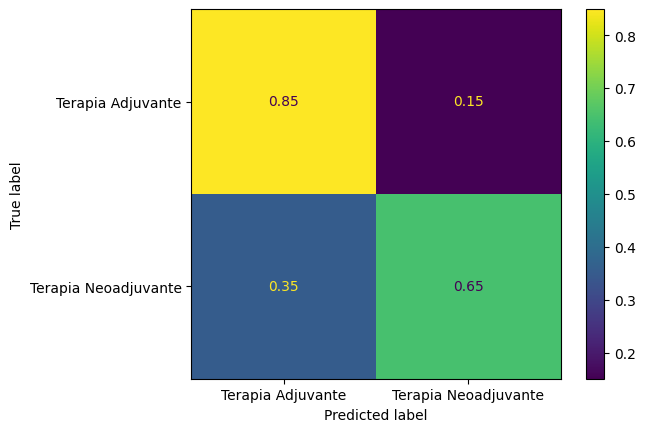

In [ ]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test_new, y_pred_adab, normalize='true')

# versão visualmente mais bonita da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=adab.classes_)

disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

adab_params= {
    'n_estimators': [10, 100],
    'learning_rate': [1, 5],
    'estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
    'algorithm': ['SAMME']
}

adab_to_grid= AdaBoostClassifier()
adab_grid_search = GridSearchCV(adab_to_grid, adab_params)

In [ ]:
adab_grid_search.fit(X_train_new, y_train_new)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier(),
                                       RandomForestClassifier()],
                         'learning_rate': [1, 5], 'n_estimators': [10, 100]})

In [ ]:
adab_grid_search.best_params_

{'algorithm': 'SAMME',
 'estimator': RandomForestClassifier(),
 'learning_rate': 1,
 'n_estimators': 100}

In [ ]:
adab_grid_search.best_score_

0.738709677419355

## Explicabilidade

- Explicabilidade em machine learning é o processo de tornar os modelos de aprendizagem de máquina mais transparentes, visíveis e compreensíveis para os usuários. É muito importante para a tomada de decisão e a adoção de soluções de aprendizado de máquina. 

- A explicabilidade é importante para ajudar os usuários a entender os resultados de um modelo de aprendizado de máquina e permitir que eles façam escolhas informadas. Ela também pode ser usada para garantir que os modelos de aprendizado de máquina estão sendo usados de maneira apropriada. É importante que os usuários entendam o que o modelo está dizendo e as razões por trás das decisões tomadas, a fim de garantir que o modelo esteja funcionando corretamente.


É preciso instalar a biblioteca:

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dado a biblioteca instalada, é preciso importar ela e instanciá-la, passando o modelo e a base de dados de testes.

In [ ]:
import shap

# Obtendo o melhor modelo
best_model = adab_grid_search.best_estimator_

# Inicializando o explainer do Shap com o melhor modelo usando o TreeExplainer
explainer = shap.KernelExplainer(best_model.predict_proba, X_train_new)

# Obtendo as explicações dos recursos para os dados de teste
# shap_values = explainer.shap_values(X_test_new)
shap_values = shap.sample(X_test_new, 5)



Tendo os valores, é possível fazer um gráfico para melhor visualização através do summary_plot

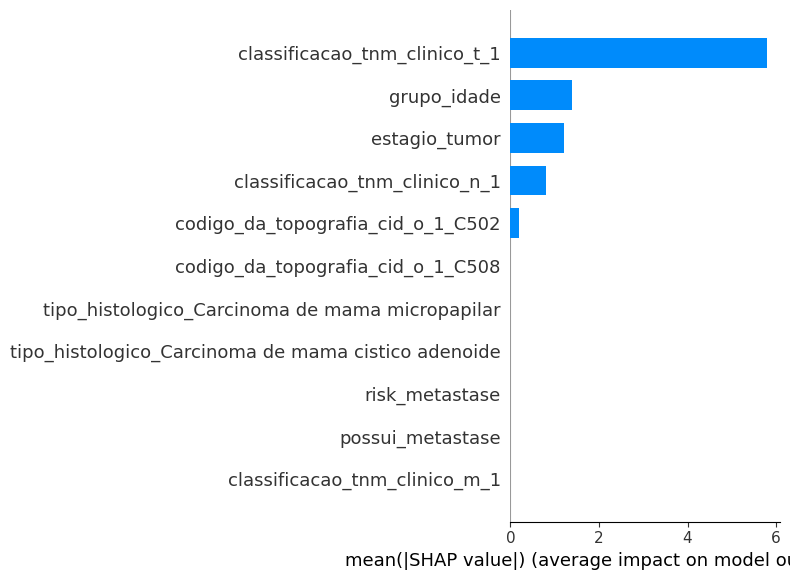

In [ ]:
shap.summary_plot(shap_values, X_test_new, plot_type="bar");

## Conclusão

O projeto resultou na criação de modelos de classificação com alta precisão para identificar o melhor tipo de tratamento (neo ou adjuvante) para pacientes com câncer de mama, com base em dados coletados a partir de 2008. Recomendamos ao parceiro de negócios que utilize o modelo como uma ferramenta de apoio à decisão, juntamente com outras informações, como a saúde geral do paciente e as preferências pessoais. É importante garantir a privacidade e segurança dos dados dos pacientes, ser transparente sobre o uso do modelo e incluir um manual de usuário detalhado para auxiliar na sua utilização. Além disso, é fundamental agir com ética e responsabilidade social em relação ao uso do modelo, garantindo a equidade e justiça no tratamento de todos os pacientes. Sendo assim, nosso desenvolvimento final é uma ferramenta a mais para o médico, nunca sua substituição.
	
Tendo isso em vista, gostaríamos de concluir com algumas informações do nosso modelo. Primeiro, o AdaBoost foi o modelo candidato, com 76% de acurácia. Sua escolha foi feita após o tuning  de hiperparâmetros, apresentando bons desempenhos na Matriz de Confusão.
Ademais, há 3 formas de utilizar as predições com este modelo: 
1. Collab primário - sendo este nosso principal desenvolvimento, neste arquivo é possível visualizar todas as etapas do CRISP-DM: desde o entendimento do negócio, até o pré-processamento e modelagem. É possível visualizá-lo neste link: https://colab.research.google.com/drive/1t5a0cfLaujA8gJyxPgCFmIkEioXdfW8l?authuser=1#scrollTo=TPnQNlJhvtcq.

2. Collab secundário - constitui de um collab totalmente dedicado em apenas realizar a predição com o modelo escolhido, sem a necessidade de passar por todos os tópicos do CRISP-DM e ser algo mais rápido.  É possível visualizá-lo neste link: https://colab.research.google.com/drive/1iaUjSFcTL1bcq7E2MzgsjZlR02w9lDFm?usp=sharing
3. Plataforma web - como comentado anteriormente, refere-se a um site como uma interface elegante e pronta para ser aplicada. É possível acessá-lo através desse link: https://vitorhrds2-streamlit-example-main-6tbvd2.streamlit.app/.  Nesse sentido, seu manual de utilização pode ser encontrado aqui: https://docs.google.com/document/d/15wpiNbhQyPhiHRpE_wevYBLKOLa-fIFc/edit#

A seguir estão algumas recomendações de como utilizar as soluções citadas acima:
- Fins de pesquisa -> collab primário
- Predição com detalhes de forma precisa -> collab secundário
- Soluções rápidas e em massa -> plataforma web

Para mais informações, todos os arquivos do projeto podem ser encontrados no nosso repositório do GitHub, contendo informações de como utilizar e rodar as aplicações, em que é possível acessar através do link: https://github.com/2023M3T5-Inteli/grupo6.
